This is a (rough) implementation of the homomorphic image encryption scheme proposed by [Li, et al.](https://doi.org/10.1016/j.sigpro.2011.10.020)

Suppose we have the following image as input.

In [1]:
imlst = [[217, 215, 212, 212, 216, 218, 220, 221, 221, 220, 218, 216, 216, 215, 221, 221, 220, 221, 220, 220, 218, 218, 221, 224, 227, 227, 224, 224, 226, 227, 225, 227, 229, 226, 226, 221, 220, 216, 215, 213, 213, 219, 223, 228, 227, 225, 225, 226, 225, 223, 219, 216, 216, 216, 213, 210, 208, 213, 219, 222, 223, 225, 224, 225, 226, 226, 225, 226, 225, 226, 226, 226, 228, 227, 225, 224, 225, 224, 223, 223, 223, 221, 221, 220, 220, 220, 220, 220, 219, 219, 220, 220, 221, 219, 216, 210, 204, 201, 201, 207, 212, 213, 214, 217, 219, 221, 221, 221, 221, 220, 222, 225, 227, 225, 226, 226, 225, 227, 228, 228], [213, 212, 209, 211, 213, 216, 218, 219, 220, 220, 214, 213, 215, 218, 224, 220, 219, 218, 217, 218, 213, 214, 219, 227, 229, 230, 229, 221, 223, 222, 220, 221, 222, 222, 222, 218, 217, 212, 212, 212, 216, 220, 225, 226, 227, 227, 227, 225, 221, 219, 215, 216, 214, 214, 210, 209, 212, 217, 221, 225, 224, 225, 225, 224, 226, 226, 225, 225, 226, 226, 224, 224, 225, 223, 226, 224, 225, 225, 221, 222, 221, 221, 219, 218, 219, 220, 219, 219, 220, 220, 222, 221, 221, 221, 216, 213, 210, 205, 204, 209, 213, 214, 213, 214, 217, 219, 220, 218, 220, 220, 223, 225, 227, 227, 227, 226, 225, 227, 228, 228], [211, 213, 213, 215, 214, 216, 217, 219, 219, 216, 213, 213, 218, 221, 224, 221, 218, 217, 215, 213, 211, 214, 217, 225, 228, 229, 224, 221, 219, 218, 217, 218, 217, 219, 220, 218, 217, 211, 211, 213, 218, 221, 227, 226, 227, 225, 227, 223, 220, 218, 215, 213, 212, 212, 210, 209, 215, 220, 224, 227, 226, 225, 227, 227, 226, 225, 225, 227, 225, 226, 223, 224, 225, 224, 225, 224, 225, 225, 223, 223, 222, 223, 222, 220, 219, 220, 220, 221, 221, 222, 225, 224, 224, 222, 219, 219, 215, 210, 208, 208, 211, 214, 215, 214, 218, 217, 218, 217, 218, 222, 222, 223, 227, 226, 227, 225, 227, 226, 229, 228], [214, 213, 214, 217, 217, 218, 218, 217, 219, 216, 215, 216, 218, 224, 226, 224, 218, 216, 217, 213, 213, 210, 217, 219, 222, 223, 221, 218, 216, 215, 213, 212, 216, 217, 216, 219, 212, 212, 209, 213, 219, 221, 225, 225, 227, 227, 225, 220, 219, 214, 214, 213, 212, 210, 211, 214, 218, 222, 226, 227, 226, 227, 227, 226, 226, 226, 226, 226, 225, 225, 224, 226, 226, 227, 227, 227, 227, 227, 225, 225, 224, 225, 224, 224, 224, 222, 224, 225, 225, 226, 226, 225, 224, 225, 222, 221, 220, 213, 208, 208, 211, 212, 214, 215, 218, 217, 217, 217, 219, 220, 220, 224, 227, 226, 226, 226, 226, 227, 227, 227], [214, 213, 216, 217, 219, 219, 220, 218, 218, 216, 219, 220, 223, 225, 227, 222, 219, 220, 219, 215, 212, 212, 216, 216, 216, 218, 217, 217, 217, 214, 213, 211, 210, 213, 213, 212, 211, 212, 209, 213, 218, 219, 221, 221, 223, 225, 222, 219, 217, 215, 212, 214, 212, 211, 213, 218, 223, 226, 227, 228, 227, 227, 226, 226, 227, 227, 227, 226, 227, 226, 227, 227, 226, 228, 228, 228, 228, 227, 226, 225, 224, 226, 226, 226, 227, 227, 225, 225, 224, 223, 224, 223, 222, 223, 225, 222, 219, 213, 208, 208, 210, 211, 214, 215, 218, 217, 217, 216, 219, 220, 221, 224, 226, 228, 226, 227, 227, 225, 226, 227], [218, 217, 218, 220, 218, 219, 218, 216, 214, 218, 223, 224, 222, 224, 223, 220, 221, 222, 221, 218, 216, 217, 216, 216, 217, 217, 219, 218, 217, 214, 213, 213, 211, 211, 213, 212, 211, 209, 212, 216, 217, 218, 218, 220, 224, 222, 220, 217, 215, 216, 216, 213, 212, 210, 216, 221, 224, 226, 225, 226, 227, 227, 227, 228, 226, 226, 227, 225, 225, 225, 226, 227, 227, 228, 226, 225, 226, 226, 226, 223, 222, 224, 227, 227, 226, 226, 225, 224, 222, 222, 221, 221, 221, 223, 223, 220, 219, 213, 207, 208, 209, 210, 213, 215, 217, 216, 218, 218, 221, 221, 222, 224, 227, 226, 226, 226, 226, 225, 226, 228], [219, 220, 218, 219, 217, 217, 215, 212, 215, 220, 227, 226, 224, 222, 219, 221, 220, 221, 221, 220, 219, 220, 217, 217, 217, 217, 219, 216, 215, 217, 216, 216, 213, 217, 215, 213, 212, 213, 219, 219, 220, 220, 221, 224, 226, 223, 220, 218, 218, 216, 216, 213, 211, 211, 218, 222, 226, 225, 225, 225, 227, 226, 228, 227, 225, 224, 223, 224, 223, 221, 224, 224, 224, 224, 222, 222, 221, 222, 222, 220, 220, 221, 225, 225, 226, 225, 221, 218, 218, 219, 219, 219, 220, 221, 221, 221, 219, 214, 210, 210, 209, 209, 211, 211, 213, 216, 217, 219, 221, 221, 222, 224, 225, 225, 224, 224, 223, 224, 227, 228], [221, 220, 219, 218, 218, 215, 212, 213, 218, 226, 227, 227, 226, 222, 220, 220, 217, 220, 222, 222, 222, 223, 219, 220, 219, 219, 219, 217, 217, 217, 218, 217, 216, 218, 217, 215, 213, 217, 222, 226, 226, 226, 227, 228, 227, 227, 220, 217, 217, 217, 216, 213, 213, 215, 219, 224, 225, 226, 224, 227, 229, 228, 228, 226, 224, 220, 220, 222, 220, 220, 219, 220, 220, 219, 220, 219, 219, 220, 218, 218, 219, 219, 221, 222, 221, 219, 218, 214, 214, 214, 217, 217, 219, 219, 218, 219, 218, 216, 214, 209, 207, 208, 209, 212, 210, 213, 219, 221, 222, 221, 221, 225, 224, 222, 221, 222, 222, 223, 226, 228], [222, 220, 217, 214, 215, 213, 214, 218, 223, 228, 227, 227, 225, 222, 221, 217, 216, 219, 221, 223, 226, 226, 225, 223, 220, 220, 220, 219, 221, 220, 221, 217, 218, 216, 219, 216, 217, 222, 228, 229, 229, 228, 228, 229, 227, 226, 221, 218, 218, 217, 213, 210, 212, 218, 223, 228, 229, 227, 227, 229, 228, 228, 228, 228, 226, 224, 224, 226, 225, 224, 221, 219, 219, 219, 220, 219, 220, 219, 219, 218, 219, 219, 218, 220, 218, 217, 214, 213, 215, 216, 217, 217, 219, 218, 218, 218, 218, 217, 213, 208, 204, 206, 211, 209, 209, 214, 220, 221, 222, 223, 224, 224, 220, 221, 221, 220, 221, 225, 227, 229], [218, 217, 214, 214, 213, 213, 217, 221, 225, 225, 227, 227, 224, 222, 217, 216, 218, 219, 223, 223, 223, 225, 226, 223, 220, 219, 221, 227, 226, 228, 222, 220, 217, 218, 217, 216, 218, 223, 228, 230, 230, 231, 229, 228, 227, 220, 218, 218, 217, 215, 209, 209, 216, 222, 228, 230, 233, 233, 232, 231, 231, 231, 231, 229, 229, 229, 229, 230, 230, 228, 226, 221, 219, 218, 219, 221, 222, 222, 218, 219, 219, 219, 219, 219, 219, 218, 217, 217, 217, 217, 218, 218, 219, 219, 217, 217, 218, 215, 212, 206, 206, 207, 209, 211, 210, 216, 221, 223, 225, 227, 226, 225, 222, 220, 221, 221, 220, 224, 227, 227], [219, 216, 213, 210, 210, 215, 221, 223, 224, 220, 225, 225, 224, 219, 217, 217, 219, 222, 223, 221, 221, 224, 224, 221, 219, 219, 223, 228, 230, 229, 223, 220, 217, 217, 216, 218, 219, 219, 225, 229, 229, 231, 229, 229, 226, 222, 222, 223, 222, 224, 219, 220, 224, 228, 229, 232, 233, 233, 230, 231, 233, 231, 231, 235, 236, 232, 229, 232, 235, 233, 228, 224, 221, 222, 221, 222, 222, 222, 219, 219, 219, 220, 219, 220, 220, 218, 218, 218, 218, 217, 219, 219, 218, 218, 218, 218, 218, 216, 211, 208, 207, 209, 209, 208, 212, 218, 222, 225, 227, 228, 228, 224, 222, 223, 221, 222, 220, 224, 227, 228], [220, 217, 210, 208, 210, 217, 225, 227, 224, 221, 222, 225, 224, 220, 219, 219, 223, 226, 224, 222, 223, 225, 220, 219, 220, 218, 222, 226, 230, 227, 221, 217, 216, 216, 216, 219, 220, 220, 221, 228, 233, 234, 232, 234, 234, 233, 230, 233, 225, 219, 212, 210, 215, 211, 195, 192, 197, 203, 199, 199, 201, 187, 191, 215, 209, 207, 203, 203, 204, 214, 217, 220, 226, 228, 231, 230, 226, 226, 224, 221, 221, 220, 220, 220, 219, 219, 218, 217, 218, 218, 218, 218, 217, 218, 217, 218, 218, 215, 211, 208, 209, 209, 208, 208, 212, 218, 224, 226, 229, 229, 228, 226, 226, 223, 221, 220, 220, 222, 226, 227], [220, 214, 209, 208, 214, 220, 226, 226, 228, 227, 226, 224, 220, 218, 220, 223, 226, 227, 225, 225, 226, 224, 221, 219, 219, 219, 219, 226, 227, 223, 218, 216, 220, 220, 225, 227, 233, 231, 228, 220, 214, 204, 192, 195, 189, 165, 153, 153, 134, 126, 120, 120, 121, 116, 107, 103, 101, 104, 107, 105, 105, 104, 102, 110, 112, 110, 113, 111, 107, 117, 128, 136, 149, 159, 174, 188, 193, 197, 208, 222, 222, 227, 227, 226, 224, 222, 221, 219, 218, 217, 218, 217, 216, 218, 218, 216, 214, 212, 209, 209, 211, 209, 208, 208, 212, 217, 222, 226, 229, 228, 228, 227, 226, 224, 221, 220, 220, 223, 226, 227], [219, 214, 208, 210, 217, 222, 226, 226, 228, 228, 226, 220, 216, 217, 221, 227, 227, 227, 228, 227, 226, 225, 220, 220, 222, 223, 224, 228, 227, 227, 227, 231, 233, 236, 230, 222, 211, 191, 171, 148, 130, 122, 116, 114, 111, 114, 115, 116, 115, 115, 114, 117, 116, 113, 114, 112, 111, 114, 113, 113, 111, 110, 110, 111, 112, 111, 106, 109, 110, 111, 109, 107, 105, 107, 108, 109, 114, 116, 122, 145, 155, 171, 188, 203, 214, 221, 226, 227, 226, 223, 220, 218, 217, 216, 216, 212, 211, 208, 208, 210, 210, 211, 210, 210, 211, 217, 221, 222, 225, 226, 228, 226, 227, 225, 220, 221, 220, 221, 225, 226], [217, 214, 208, 212, 219, 223, 225, 225, 227, 227, 224, 216, 215, 215, 223, 227, 227, 227, 228, 228, 226, 224, 222, 223, 227, 230, 234, 232, 231, 229, 225, 211, 195, 182, 162, 146, 135, 129, 130, 128, 127, 127, 127, 124, 124, 123, 120, 120, 119, 117, 117, 115, 117, 114, 114, 115, 112, 112, 112, 113, 112, 110, 113, 112, 114, 112, 111, 113, 112, 115, 116, 115, 114, 117, 116, 112, 115, 119, 119, 118, 118, 116, 116, 124, 140, 147, 165, 186, 209, 218, 225, 227, 224, 221, 217, 214, 209, 207, 207, 211, 213, 214, 214, 214, 216, 217, 219, 218, 221, 226, 228, 229, 226, 225, 222, 220, 221, 221, 225, 225], [217, 216, 212, 216, 219, 225, 224, 224, 226, 225, 219, 215, 214, 216, 221, 225, 227, 227, 225, 225, 226, 225, 231, 232, 233, 228, 226, 213, 194, 169, 157, 147, 144, 142, 140, 132, 137, 136, 130, 131, 130, 130, 128, 127, 125, 123, 123, 120, 117, 118, 117, 118, 116, 115, 115, 116, 115, 113, 113, 113, 112, 112, 112, 113, 111, 112, 111, 114, 115, 116, 117, 117, 116, 118, 119, 115, 114, 122, 123, 127, 127, 124, 127, 131, 131, 124, 124, 121, 130, 144, 165, 189, 210, 222, 227, 225, 217, 215, 213, 212, 213, 217, 217, 217, 217, 217, 214, 216, 219, 225, 227, 229, 229, 227, 223, 220, 220, 223, 224, 227], [217, 216, 218, 219, 221, 222, 224, 225, 224, 222, 218, 214, 214, 217, 221, 222, 225, 225, 225, 227, 234, 237, 237, 233, 211, 173, 165, 159, 145, 145, 146, 145, 142, 140, 139, 137, 140, 135, 135, 134, 135, 137, 131, 131, 126, 125, 124, 122, 120, 120, 118, 117, 118, 117, 114, 112, 112, 111, 110, 112, 112, 113, 113, 111, 112, 111, 112, 112, 114, 113, 116, 117, 117, 119, 117, 116, 117, 121, 126, 128, 131, 125, 128, 132, 135, 135, 141, 137, 139, 135, 126, 126, 133, 144, 175, 202, 216, 228, 230, 224, 220, 219, 217, 216, 217, 218, 215, 214, 217, 221, 229, 230, 229, 229, 226, 220, 221, 224, 224, 227], [215, 218, 218, 220, 223, 221, 222, 223, 222, 219, 214, 215, 217, 219, 218, 224, 228, 235, 231, 233, 236, 210, 186, 163, 152, 149, 150, 152, 151, 147, 143, 143, 142, 143, 142, 137, 140, 138, 139, 139, 137, 138, 133, 129, 128, 127, 125, 122, 121, 120, 117, 115, 116, 116, 113, 113, 111, 111, 108, 110, 110, 110, 110, 110, 109, 109, 113, 113, 113, 115, 116, 119, 119, 119, 117, 117, 123, 121, 124, 123, 125, 126, 130, 130, 129, 131, 133, 136, 137, 137, 138, 136, 135, 135, 138, 137, 151, 167, 198, 219, 229, 228, 225, 221, 219, 217, 215, 216, 218, 221, 228, 230, 231, 231, 227, 220, 221, 223, 224, 225], [216, 218, 219, 220, 221, 219, 222, 219, 219, 216, 213, 213, 216, 220, 228, 234, 238, 238, 215, 196, 177, 159, 156, 156, 155, 156, 151, 151, 150, 147, 146, 146, 145, 143, 140, 137, 140, 140, 141, 139, 137, 135, 136, 131, 127, 128, 126, 122, 120, 119, 116, 111, 114, 114, 113, 113, 108, 109, 110, 109, 108, 109, 107, 110, 109, 108, 110, 113, 111, 111, 112, 116, 118, 116, 116, 118, 121, 123, 121, 123, 126, 127, 129, 128, 129, 128, 125, 126, 130, 134, 136, 137, 136, 142, 144, 141, 142, 135, 124, 140, 172, 204, 223, 228, 227, 222, 218, 218, 219, 221, 227, 231, 232, 230, 226, 220, 221, 221, 223, 224], [216, 219, 220, 220, 220, 221, 220, 220, 216, 212, 210, 216, 227, 237, 239, 228, 211, 186, 169, 171, 168, 162, 161, 156, 156, 159, 159, 154, 152, 149, 146, 147, 147, 143, 142, 142, 143, 142, 141, 141, 139, 136, 136, 130, 126, 129, 126, 122, 122, 118, 116, 115, 114, 114, 114, 111, 110, 110, 107, 105, 105, 103, 103, 105, 103, 102, 104, 104, 104, 107, 111, 113, 112, 113, 114, 114, 116, 118, 120, 124, 124, 122, 126, 126, 126, 128, 128, 127, 126, 129, 128, 127, 130, 136, 138, 136, 136, 137, 137, 135, 131, 130, 150, 185, 218, 228, 227, 224, 220, 221, 228, 231, 232, 230, 225, 220, 220, 222, 223, 224], [217, 219, 221, 222, 223, 222, 220, 218, 213, 214, 221, 234, 238, 241, 214, 185, 175, 171, 172, 172, 166, 165, 161, 157, 152, 155, 154, 155, 153, 152, 147, 148, 148, 147, 148, 146, 146, 144, 144, 144, 141, 138, 139, 131, 126, 126, 123, 119, 117, 119, 116, 114, 114, 111, 110, 106, 106, 106, 101, 101, 101, 101, 98, 98, 98, 101, 99, 97, 101, 100, 101, 104, 105, 106, 107, 108, 110, 114, 117, 119, 121, 120, 120, 121, 122, 125, 125, 124, 123, 125, 125, 121, 121, 122, 126, 125, 126, 130, 132, 132, 135, 135, 139, 132, 141, 167, 207, 227, 232, 228, 227, 230, 231, 227, 225, 222, 222, 223, 224, 224], [220, 221, 224, 225, 224, 222, 218, 218, 223, 227, 238, 229, 215, 188, 177, 179, 180, 174, 172, 171, 169, 164, 162, 161, 159, 158, 156, 155, 152, 152, 152, 151, 151, 149, 149, 145, 144, 146, 143, 144, 143, 141, 138, 133, 130, 162, 189, 179, 160, 133, 116, 106, 106, 108, 107, 104, 102, 103, 101, 100, 98, 98, 95, 94, 93, 95, 93, 94, 95, 95, 95, 97, 98, 99, 102, 103, 104, 107, 111, 112, 114, 115, 119, 119, 119, 120, 122, 122, 122, 120, 118, 119, 119, 120, 121, 119, 118, 120, 121, 126, 132, 132, 136, 134, 140, 141, 130, 152, 197, 224, 227, 228, 229, 230, 226, 224, 224, 226, 226, 225], [221, 225, 225, 226, 223, 219, 222, 231, 228, 232, 223, 192, 182, 180, 181, 178, 176, 177, 175, 172, 169, 165, 163, 163, 160, 157, 157, 157, 153, 151, 151, 149, 149, 148, 143, 142, 143, 148, 148, 147, 145, 143, 135, 148, 190, 212, 215, 215, 215, 206, 196, 177, 138, 112, 101, 97, 96, 95, 93, 93, 93, 95, 91, 91, 92, 91, 92, 92, 91, 91, 92, 92, 89, 85, 87, 93, 98, 99, 104, 106, 109, 111, 115, 117, 114, 118, 115, 119, 116, 116, 115, 116, 114, 114, 115, 116, 116, 117, 118, 121, 124, 125, 127, 127, 130, 134, 134, 128, 122, 147, 203, 229, 227, 225, 227, 226, 227, 224, 227, 225], [224, 225, 224, 224, 223, 227, 235, 233, 208, 195, 186, 185, 186, 185, 182, 181, 178, 178, 174, 174, 172, 171, 165, 162, 161, 158, 157, 158, 154, 151, 149, 145, 146, 146, 142, 144, 146, 147, 153, 150, 150, 144, 148, 198, 216, 213, 215, 214, 213, 214, 213, 216, 213, 201, 187, 168, 119, 122, 116, 105, 91, 86, 84, 85, 85, 84, 85, 83, 84, 84, 78, 79, 136, 166, 141, 121, 84, 93, 96, 96, 96, 96, 106, 109, 109, 109, 109, 111, 112, 112, 110, 110, 110, 111, 113, 114, 116, 117, 117, 117, 119, 119, 123, 124, 127, 125, 127, 129, 130, 130, 125, 154, 212, 233, 231, 228, 229, 228, 230, 232], [224, 224, 220, 226, 233, 231, 227, 206, 193, 193, 189, 190, 188, 189, 184, 181, 180, 181, 176, 173, 171, 171, 166, 164, 163, 158, 152, 153, 152, 149, 148, 148, 144, 144, 145, 145, 148, 149, 149, 147, 143, 139, 187, 212, 214, 214, 216, 216, 219, 216, 215, 213, 214, 216, 217, 217, 161, 153, 140, 124, 101, 89, 84, 86, 86, 84, 85, 84, 82, 72, 113, 188, 224, 225, 228, 233, 176, 100, 103, 101, 138, 168, 105, 94, 101, 100, 105, 105, 104, 108, 109, 108, 108, 107, 111, 112, 114, 114, 117, 117, 117, 120, 119, 121, 123, 120, 122, 125, 128, 134, 133, 124, 127, 174, 218, 230, 229, 210, 144, 142], [223, 223, 222, 232, 231, 211, 197, 197, 196, 190, 188, 192, 189, 187, 184, 183, 180, 180, 178, 174, 172, 167, 163, 164, 160, 158, 153, 150, 147, 149, 147, 143, 140, 137, 134, 136, 139, 143, 147, 148, 147, 165, 199, 210, 212, 213, 212, 214, 216, 217, 216, 217, 214, 216, 218, 195, 93, 88, 83, 83, 79, 79, 84, 84, 81, 80, 80, 78, 74, 156, 206, 214, 212, 217, 222, 231, 238, 225, 219, 216, 226, 236, 194, 140, 106, 89, 98, 101, 99, 102, 104, 105, 105, 107, 108, 110, 110, 113, 114, 115, 114, 116, 116, 118, 121, 119, 118, 120, 123, 126, 126, 128, 127, 123, 135, 192, 229, 232, 214, 135], [221, 223, 228, 231, 210, 198, 199, 197, 193, 193, 193, 191, 189, 185, 185, 182, 177, 179, 173, 169, 171, 166, 165, 161, 156, 153, 151, 148, 144, 141, 135, 128, 132, 131, 141, 150, 150, 151, 149, 144, 150, 188, 202, 209, 211, 211, 211, 210, 211, 213, 214, 212, 212, 211, 215, 180, 69, 60, 68, 72, 70, 70, 73, 74, 81, 82, 78, 67, 118, 202, 201, 193, 199, 208, 216, 226, 231, 240, 237, 237, 227, 230, 226, 226, 216, 142, 94, 82, 88, 94, 97, 101, 101, 104, 104, 108, 109, 113, 111, 113, 113, 114, 116, 115, 116, 118, 119, 119, 120, 121, 122, 124, 125, 127, 128, 117, 166, 225, 238, 225], [226, 232, 234, 209, 204, 202, 199, 202, 195, 195, 195, 191, 190, 185, 183, 180, 181, 177, 172, 171, 167, 162, 161, 156, 151, 149, 140, 142, 142, 140, 130, 135, 128, 130, 137, 132, 129, 130, 132, 143, 174, 193, 205, 208, 208, 207, 208, 209, 209, 210, 211, 209, 209, 212, 205, 148, 82, 52, 51, 51, 54, 55, 56, 54, 59, 64, 73, 101, 198, 191, 182, 197, 205, 215, 220, 222, 235, 234, 235, 220, 202, 215, 217, 226, 227, 227, 220, 197, 117, 86, 90, 92, 93, 100, 103, 104, 105, 107, 107, 109, 111, 111, 115, 113, 116, 118, 118, 117, 120, 121, 121, 119, 123, 125, 129, 130, 118, 140, 211, 236], [225, 231, 207, 204, 201, 200, 199, 204, 198, 195, 197, 190, 187, 189, 182, 182, 183, 180, 175, 173, 166, 161, 155, 145, 148, 163, 165, 165, 159, 145, 126, 119, 119, 115, 115, 117, 111, 113, 140, 164, 187, 198, 206, 205, 207, 207, 207, 209, 208, 207, 206, 208, 208, 212, 151, 106, 102, 63, 61, 58, 61, 64, 69, 64, 59, 145, 194, 199, 214, 212, 204, 206, 210, 217, 220, 214, 224, 218, 235, 226, 204, 212, 214, 215, 223, 227, 224, 229, 225, 137, 91, 95, 92, 94, 92, 96, 101, 106, 105, 105, 105, 106, 108, 109, 112, 116, 117, 116, 119, 118, 121, 121, 122, 123, 126, 128, 126, 122, 116, 193], [223, 207, 208, 206, 207, 203, 205, 202, 198, 195, 196, 193, 188, 185, 183, 185, 180, 174, 170, 167, 162, 153, 163, 178, 196, 198, 176, 147, 126, 121, 119, 103, 95, 82, 76, 86, 97, 119, 150, 178, 195, 204, 204, 203, 205, 205, 204, 206, 204, 204, 202, 205, 208, 184, 121, 117, 111, 83, 79, 84, 84, 87, 88, 80, 142, 198, 209, 210, 213, 218, 229, 221, 219, 211, 204, 204, 206, 208, 219, 239, 240, 207, 205, 214, 224, 224, 222, 220, 230, 225, 117, 133, 172, 100, 100, 98, 96, 98, 100, 102, 105, 103, 105, 104, 108, 112, 111, 114, 116, 117, 119, 119, 122, 123, 122, 123, 126, 127, 126, 115], [207, 212, 209, 211, 207, 208, 206, 201, 202, 198, 193, 188, 186, 184, 185, 183, 182, 182, 175, 176, 175, 197, 206, 190, 172, 147, 135, 124, 115, 101, 87, 78, 70, 73, 87, 108, 127, 148, 171, 191, 202, 204, 198, 200, 202, 203, 201, 199, 200, 203, 200, 201, 188, 161, 145, 132, 122, 125, 113, 111, 112, 112, 105, 100, 141, 150, 177, 175, 172, 174, 184, 199, 213, 220, 211, 194, 192, 194, 198, 222, 241, 223, 201, 204, 217, 220, 222, 225, 224, 232, 218, 190, 208, 131, 102, 100, 109, 104, 104, 103, 103, 104, 104, 107, 104, 107, 110, 111, 111, 113, 115, 118, 121, 121, 122, 124, 123, 126, 127, 123], [211, 212, 209, 210, 206, 209, 207, 202, 200, 196, 189, 186, 182, 176, 134, 142, 149, 167, 174, 175, 163, 185, 167, 144, 131, 116, 115, 113, 104, 86, 72, 68, 80, 105, 136, 142, 150, 172, 192, 201, 202, 200, 199, 199, 199, 200, 199, 198, 197, 196, 193, 187, 177, 196, 182, 150, 152, 164, 138, 132, 130, 122, 110, 128, 178, 205, 215, 214, 206, 196, 149, 140, 154, 176, 209, 195, 177, 183, 180, 192, 224, 237, 202, 193, 203, 215, 223, 219, 211, 221, 226, 218, 187, 185, 212, 173, 97, 105, 109, 114, 114, 111, 107, 103, 105, 105, 108, 108, 108, 112, 112, 114, 120, 121, 121, 119, 120, 121, 125, 126], [211, 208, 211, 213, 210, 205, 204, 206, 199, 192, 185, 184, 186, 141, 80, 91, 68, 109, 157, 163, 143, 169, 171, 133, 106, 92, 76, 86, 91, 94, 89, 95, 120, 135, 145, 155, 171, 187, 199, 201, 205, 199, 193, 196, 195, 194, 194, 194, 190, 185, 187, 199, 198, 206, 178, 160, 140, 141, 143, 137, 127, 131, 154, 195, 210, 217, 225, 221, 224, 226, 211, 190, 182, 185, 189, 205, 196, 184, 168, 172, 196, 228, 214, 187, 190, 205, 217, 222, 206, 224, 187, 168, 188, 214, 219, 238, 145, 104, 104, 102, 107, 115, 117, 114, 107, 102, 104, 105, 105, 106, 108, 112, 114, 116, 118, 118, 119, 119, 121, 120], [212, 209, 213, 212, 208, 206, 211, 205, 201, 194, 190, 185, 172, 136, 103, 107, 103, 100, 145, 159, 152, 142, 135, 129, 123, 119, 116, 104, 100, 104, 111, 133, 147, 152, 157, 167, 182, 192, 196, 193, 194, 192, 193, 193, 193, 193, 191, 188, 183, 187, 211, 200, 191, 185, 171, 161, 133, 124, 136, 139, 167, 195, 201, 212, 215, 215, 229, 224, 222, 203, 216, 219, 211, 216, 199, 189, 195, 191, 182, 183, 185, 213, 218, 178, 167, 185, 206, 220, 214, 219, 187, 193, 214, 214, 210, 220, 191, 104, 110, 106, 102, 103, 106, 114, 120, 119, 108, 102, 102, 103, 107, 107, 110, 113, 116, 116, 119, 120, 118, 117], [213, 214, 211, 213, 212, 211, 210, 207, 206, 196, 190, 187, 196, 183, 134, 130, 116, 130, 140, 130, 127, 135, 145, 136, 134, 124, 116, 104, 109, 127, 145, 156, 161, 165, 170, 179, 186, 191, 193, 198, 190, 194, 190, 187, 188, 187, 191, 189, 190, 196, 203, 194, 188, 185, 177, 164, 142, 158, 178, 217, 217, 210, 216, 215, 220, 225, 222, 223, 223, 220, 209, 202, 207, 214, 205, 177, 170, 184, 181, 179, 176, 206, 217, 167, 147, 166, 194, 209, 211, 209, 182, 187, 199, 197, 206, 214, 226, 146, 107, 110, 107, 104, 103, 106, 106, 114, 123, 119, 104, 100, 103, 103, 107, 111, 115, 115, 117, 120, 118, 116], [217, 219, 213, 219, 215, 218, 212, 212, 199, 196, 198, 193, 179, 172, 159, 146, 133, 139, 129, 115, 94, 96, 122, 123, 114, 103, 109, 127, 147, 156, 164, 166, 166, 173, 186, 198, 207, 207, 215, 227, 230, 235, 238, 209, 178, 179, 182, 187, 191, 197, 197, 188, 182, 179, 173, 182, 207, 218, 212, 212, 207, 211, 214, 211, 214, 214, 216, 222, 224, 230, 224, 207, 184, 187, 182, 155, 156, 177, 181, 163, 169, 179, 207, 165, 129, 145, 188, 191, 187, 185, 179, 158, 154, 163, 187, 188, 221, 197, 110, 110, 113, 110, 106, 107, 102, 102, 105, 113, 122, 117, 105, 100, 103, 106, 109, 110, 115, 114, 115, 120], [217, 221, 216, 220, 218, 218, 211, 203, 201, 203, 196, 186, 171, 171, 178, 163, 165, 161, 153, 144, 129, 107, 103, 109, 113, 116, 115, 109, 117, 125, 142, 168, 178, 203, 221, 215, 215, 223, 226, 235, 238, 237, 236, 240, 226, 194, 191, 199, 202, 200, 192, 184, 179, 177, 204, 222, 224, 218, 211, 209, 214, 216, 212, 218, 213, 218, 220, 222, 222, 229, 220, 230, 220, 163, 142, 129, 151, 154, 168, 149, 154, 152, 168, 155, 109, 106, 133, 163, 176, 175, 168, 114, 149, 170, 175, 164, 188, 193, 175, 177, 182, 175, 153, 102, 92, 96, 96, 97, 94, 105, 118, 111, 101, 102, 107, 104, 109, 112, 118, 118], [222, 224, 219, 218, 222, 213, 202, 194, 202, 202, 184, 180, 186, 191, 191, 178, 179, 175, 176, 168, 165, 157, 144, 153, 154, 163, 180, 156, 129, 111, 105, 162, 204, 210, 210, 204, 208, 217, 225, 235, 236, 240, 247, 242, 235, 236, 203, 201, 198, 190, 184, 181, 179, 208, 223, 223, 219, 213, 208, 210, 208, 202, 196, 203, 207, 215, 217, 229, 227, 221, 228, 217, 215, 213, 140, 119, 120, 133, 160, 146, 133, 133, 150, 154, 93, 91, 95, 125, 159, 155, 155, 134, 159, 164, 165, 203, 190, 169, 203, 202, 197, 189, 183, 154, 125, 91, 79, 78, 143, 180, 116, 113, 116, 99, 100, 107, 109, 112, 114, 118], [222, 223, 222, 220, 219, 207, 199, 205, 197, 184, 182, 186, 192, 196, 193, 188, 187, 186, 187, 180, 177, 175, 170, 167, 183, 200, 219, 227, 211, 178, 169, 198, 208, 207, 201, 187, 191, 194, 212, 230, 236, 254, 249, 245, 237, 244, 205, 184, 184, 179, 176, 172, 197, 213, 219, 221, 215, 206, 195, 186, 182, 155, 150, 129, 130, 155, 202, 213, 225, 226, 219, 206, 197, 205, 180, 114, 97, 107, 134, 131, 124, 126, 131, 153, 106, 78, 81, 91, 134, 134, 160, 143, 142, 146, 166, 211, 168, 117, 173, 172, 164, 165, 158, 146, 145, 121, 90, 132, 225, 234, 205, 117, 140, 154, 119, 103, 108, 109, 113, 116], [225, 225, 227, 216, 208, 197, 204, 194, 187, 188, 189, 194, 196, 198, 195, 191, 190, 189, 190, 187, 188, 185, 183, 188, 186, 195, 204, 208, 213, 196, 189, 203, 207, 202, 187, 192, 189, 208, 223, 234, 241, 243, 232, 234, 235, 218, 198, 168, 169, 166, 164, 174, 196, 207, 216, 223, 216, 180, 161, 158, 152, 95, 135, 136, 152, 165, 136, 171, 204, 215, 217, 212, 201, 182, 167, 99, 96, 99, 112, 115, 109, 134, 118, 134, 116, 71, 69, 81, 114, 119, 145, 148, 152, 167, 179, 172, 156, 90, 107, 118, 123, 126, 124, 119, 111, 114, 122, 186, 201, 209, 230, 225, 221, 219, 206, 113, 107, 110, 116, 118], [225, 227, 224, 207, 198, 207, 195, 190, 187, 191, 195, 195, 198, 197, 195, 197, 194, 196, 192, 193, 191, 188, 190, 190, 193, 186, 182, 187, 195, 189, 185, 197, 200, 203, 196, 201, 199, 192, 193, 211, 191, 196, 188, 179, 188, 182, 185, 133, 139, 148, 148, 130, 95, 120, 142, 120, 177, 131, 104, 132, 116, 95, 107, 131, 121, 163, 152, 191, 188, 168, 184, 215, 194, 156, 123, 78, 80, 85, 105, 108, 96, 97, 110, 122, 96, 58, 64, 70, 130, 167, 183, 167, 170, 168, 151, 133, 131, 109, 135, 132, 122, 120, 117, 112, 114, 113, 175, 184, 209, 213, 221, 214, 219, 208, 190, 121, 74, 94, 112, 120], [227, 225, 213, 200, 206, 193, 191, 191, 192, 197, 201, 204, 203, 198, 200, 201, 197, 196, 195, 195, 198, 200, 192, 197, 193, 185, 180, 184, 195, 199, 199, 204, 224, 235, 238, 217, 220, 199, 170, 186, 188, 182, 162, 185, 195, 210, 217, 207, 175, 122, 105, 109, 92, 76, 34, 23, 74, 102, 139, 92, 59, 59, 63, 45, 54, 148, 151, 171, 185, 152, 151, 177, 164, 144, 149, 130, 105, 86, 98, 106, 103, 96, 104, 109, 97, 107, 120, 178, 225, 212, 216, 211, 190, 129, 121, 127, 114, 164, 161, 146, 139, 129, 127, 124, 124, 137, 176, 182, 213, 203, 213, 172, 218, 203, 215, 206, 163, 73, 104, 113], [231, 216, 206, 197, 191, 194, 193, 194, 195, 200, 206, 205, 206, 205, 205, 205, 203, 203, 203, 205, 210, 223, 215, 203, 198, 194, 209, 205, 191, 178, 205, 216, 200, 205, 227, 230, 230, 243, 238, 219, 227, 225, 227, 200, 199, 209, 214, 216, 103, 81, 153, 141, 121, 53, 43, 24, 10, 27, 76, 127, 75, 29, 50, 43, 48, 99, 139, 149, 88, 109, 108, 131, 168, 200, 185, 156, 125, 122, 129, 127, 134, 121, 109, 160, 197, 186, 199, 196, 198, 185, 170, 222, 186, 139, 138, 168, 184, 215, 184, 166, 153, 141, 135, 131, 125, 172, 189, 192, 192, 184, 184, 182, 223, 194, 204, 213, 193, 135, 102, 111], [221, 211, 203, 194, 196, 201, 196, 200, 208, 212, 215, 210, 213, 216, 217, 210, 221, 219, 195, 195, 195, 201, 206, 197, 188, 167, 143, 134, 124, 169, 206, 197, 200, 206, 210, 226, 226, 231, 223, 176, 228, 235, 244, 240, 212, 220, 210, 153, 67, 122, 109, 104, 107, 94, 53, 143, 19, 26, 67, 91, 124, 70, 73, 52, 57, 70, 139, 154, 161, 138, 181, 180, 193, 206, 163, 116, 112, 116, 126, 132, 122, 120, 170, 206, 207, 200, 208, 177, 197, 130, 92, 118, 136, 191, 203, 227, 225, 195, 177, 168, 156, 144, 137, 115, 135, 167, 163, 182, 193, 178, 149, 182, 216, 203, 172, 224, 200, 176, 154, 123], [221, 203, 193, 192, 194, 195, 197, 209, 219, 222, 222, 208, 217, 217, 211, 215, 207, 190, 182, 178, 194, 203, 189, 193, 174, 141, 150, 180, 203, 213, 186, 170, 191, 202, 202, 213, 216, 201, 172, 209, 230, 235, 242, 225, 204, 213, 207, 154, 192, 187, 209, 97, 107, 93, 133, 102, 81, 139, 81, 123, 100, 117, 58, 39, 58, 89, 81, 110, 158, 164, 133, 109, 150, 138, 137, 124, 117, 119, 122, 117, 114, 151, 196, 203, 201, 219, 225, 209, 217, 174, 176, 175, 189, 195, 194, 187, 181, 178, 162, 151, 131, 131, 124, 135, 172, 153, 160, 168, 186, 183, 154, 126, 200, 207, 202, 220, 219, 184, 166, 145], [201, 193, 197, 196, 194, 204, 221, 235, 226, 221, 214, 205, 221, 220, 182, 177, 200, 178, 170, 149, 177, 183, 208, 228, 213, 211, 219, 201, 216, 179, 164, 159, 185, 193, 200, 198, 180, 157, 193, 233, 240, 233, 203, 184, 204, 204, 190, 169, 157, 160, 207, 145, 117, 87, 108, 124, 109, 103, 155, 109, 105, 66, 104, 69, 80, 133, 130, 161, 153, 120, 70, 77, 98, 110, 130, 130, 134, 129, 128, 133, 132, 135, 164, 182, 173, 178, 181, 201, 224, 220, 196, 195, 212, 172, 185, 176, 172, 166, 154, 138, 138, 132, 130, 165, 161, 156, 164, 186, 203, 227, 193, 174, 219, 220, 224, 225, 211, 186, 166, 133], [189, 194, 194, 202, 209, 222, 233, 231, 234, 239, 227, 216, 222, 217, 214, 176, 191, 162, 137, 134, 154, 168, 190, 218, 205, 183, 192, 195, 203, 175, 149, 162, 168, 185, 173, 166, 185, 199, 226, 224, 227, 214, 160, 179, 168, 150, 135, 126, 114, 184, 229, 111, 145, 108, 108, 89, 90, 104, 107, 131, 69, 81, 125, 119, 94, 99, 86, 92, 102, 96, 96, 88, 90, 119, 137, 154, 162, 154, 152, 153, 155, 153, 146, 155, 151, 145, 166, 206, 220, 168, 112, 109, 123, 125, 143, 156, 159, 154, 134, 138, 138, 135, 147, 154, 165, 170, 172, 181, 196, 198, 199, 217, 210, 202, 205, 212, 195, 179, 169, 130], [194, 195, 197, 208, 214, 218, 217, 211, 219, 219, 225, 232, 230, 235, 219, 211, 221, 229, 154, 133, 149, 168, 190, 198, 171, 195, 192, 208, 228, 219, 151, 164, 166, 136, 146, 208, 200, 212, 236, 242, 192, 108, 114, 125, 148, 173, 164, 190, 175, 195, 215, 125, 29, 91, 41, 56, 87, 64, 67, 58, 78, 52, 104, 138, 121, 96, 84, 87, 102, 106, 96, 108, 104, 96, 133, 155, 156, 162, 161, 157, 157, 149, 143, 153, 159, 169, 183, 190, 94, 52, 99, 139, 125, 146, 101, 111, 133, 133, 135, 133, 131, 128, 148, 146, 179, 170, 189, 201, 209, 213, 211, 221, 218, 214, 199, 199, 189, 174, 172, 152], [194, 191, 194, 204, 207, 211, 203, 209, 207, 208, 211, 210, 217, 216, 229, 218, 199, 203, 220, 135, 136, 175, 201, 203, 193, 179, 172, 184, 198, 239, 161, 131, 112, 122, 200, 149, 205, 209, 217, 214, 151, 141, 122, 133, 129, 119, 112, 169, 189, 199, 196, 168, 57, 41, 72, 172, 173, 136, 80, 69, 121, 143, 122, 146, 124, 118, 113, 104, 98, 100, 108, 91, 101, 99, 95, 164, 170, 172, 174, 171, 168, 165, 156, 150, 149, 159, 170, 97, 65, 75, 141, 51, 186, 217, 228, 161, 104, 104, 97, 88, 116, 138, 137, 170, 200, 204, 197, 198, 203, 216, 210, 199, 196, 205, 215, 210, 197, 195, 194, 193], [197, 193, 194, 197, 197, 199, 199, 204, 202, 197, 198, 187, 205, 210, 224, 220, 208, 214, 209, 150, 143, 179, 164, 163, 152, 169, 154, 169, 191, 223, 180, 119, 127, 182, 179, 193, 194, 220, 242, 111, 141, 178, 174, 177, 189, 162, 188, 188, 207, 154, 180, 181, 169, 138, 177, 200, 212, 146, 140, 127, 105, 141, 118, 86, 82, 80, 137, 169, 164, 172, 173, 149, 147, 94, 121, 172, 179, 182, 182, 185, 178, 175, 168, 158, 152, 157, 120, 77, 92, 98, 38, 189, 149, 200, 149, 179, 202, 96, 48, 135, 120, 174, 214, 208, 214, 217, 211, 216, 203, 198, 208, 213, 219, 219, 213, 214, 218, 209, 208, 189], [194, 200, 200, 192, 195, 195, 200, 200, 194, 197, 196, 192, 180, 186, 198, 228, 198, 205, 189, 156, 157, 183, 150, 144, 139, 147, 151, 163, 174, 192, 209, 143, 166, 167, 176, 182, 190, 210, 212, 82, 112, 168, 208, 219, 214, 207, 204, 224, 195, 162, 167, 190, 164, 187, 192, 188, 209, 161, 157, 140, 149, 134, 114, 63, 118, 200, 232, 220, 230, 231, 242, 240, 252, 217, 215, 185, 178, 180, 187, 191, 193, 189, 189, 176, 159, 141, 79, 77, 108, 64, 86, 154, 97, 168, 153, 133, 205, 196, 68, 92, 144, 217, 210, 216, 219, 219, 214, 215, 211, 204, 221, 218, 217, 213, 220, 218, 219, 219, 200, 175], [193, 197, 191, 191, 192, 195, 195, 191, 194, 195, 194, 195, 203, 182, 172, 179, 208, 187, 183, 192, 147, 157, 140, 127, 134, 128, 140, 155, 180, 195, 210, 174, 172, 159, 154, 168, 188, 208, 203, 131, 82, 90, 139, 188, 201, 212, 210, 202, 205, 232, 203, 202, 210, 170, 203, 216, 205, 184, 129, 94, 76, 43, 5, 168, 225, 224, 220, 220, 217, 222, 229, 237, 235, 239, 236, 232, 222, 213, 176, 187, 190, 193, 189, 177, 157, 99, 84, 94, 128, 57, 83, 108, 197, 209, 167, 153, 130, 228, 101, 160, 219, 212, 208, 216, 222, 203, 199, 200, 210, 195, 186, 197, 197, 198, 197, 211, 209, 212, 195, 164], [191, 191, 186, 188, 192, 189, 190, 193, 192, 190, 184, 193, 191, 185, 187, 181, 196, 196, 198, 176, 178, 192, 197, 203, 209, 208, 208, 207, 197, 185, 187, 200, 214, 206, 173, 147, 168, 204, 209, 72, 93, 104, 110, 118, 145, 158, 162, 191, 199, 226, 210, 169, 181, 184, 202, 205, 160, 31, 37, 59, 27, 33, 218, 226, 210, 197, 182, 166, 152, 159, 199, 182, 198, 208, 224, 232, 249, 235, 234, 190, 178, 184, 180, 169, 136, 113, 108, 97, 117, 102, 87, 77, 171, 142, 173, 101, 105, 204, 193, 224, 212, 212, 188, 155, 161, 170, 182, 179, 201, 208, 200, 211, 217, 224, 197, 175, 189, 207, 175, 164], [192, 189, 183, 185, 187, 194, 193, 193, 193, 180, 172, 183, 195, 199, 193, 179, 193, 207, 210, 217, 221, 223, 222, 222, 220, 219, 219, 223, 224, 210, 199, 161, 143, 146, 174, 180, 151, 185, 240, 121, 97, 98, 130, 120, 119, 134, 172, 198, 203, 219, 231, 205, 181, 189, 199, 121, 147, 238, 251, 221, 112, 221, 211, 183, 165, 159, 148, 147, 153, 145, 137, 145, 167, 168, 192, 199, 207, 244, 244, 251, 199, 166, 172, 166, 150, 141, 125, 127, 109, 126, 94, 82, 93, 148, 127, 154, 163, 216, 215, 220, 222, 222, 208, 155, 105, 99, 154, 162, 172, 165, 202, 196, 195, 221, 210, 186, 160, 174, 207, 165], [190, 187, 186, 185, 186, 184, 189, 199, 194, 191, 189, 189, 190, 186, 179, 198, 211, 219, 218, 223, 222, 224, 221, 223, 223, 224, 225, 227, 228, 227, 221, 192, 204, 188, 188, 161, 147, 167, 215, 227, 91, 62, 108, 146, 170, 181, 195, 196, 198, 223, 242, 235, 208, 181, 99, 14, 163, 139, 192, 222, 213, 211, 181, 173, 166, 150, 148, 153, 131, 132, 136, 144, 143, 133, 135, 166, 203, 215, 244, 240, 248, 215, 161, 159, 157, 140, 122, 111, 109, 119, 114, 100, 73, 81, 102, 88, 127, 209, 221, 217, 219, 218, 204, 184, 167, 155, 227, 226, 216, 160, 140, 142, 133, 175, 216, 221, 202, 180, 195, 176], [189, 186, 185, 183, 186, 190, 186, 191, 185, 190, 182, 196, 191, 180, 195, 215, 223, 224, 226, 225, 228, 222, 232, 227, 227, 227, 226, 227, 230, 230, 233, 230, 212, 196, 196, 174, 149, 162, 164, 214, 189, 117, 90, 145, 173, 167, 173, 179, 183, 212, 223, 189, 129, 47, 52, 229, 87, 117, 228, 211, 203, 191, 193, 207, 215, 195, 156, 114, 156, 141, 143, 132, 120, 116, 126, 127, 139, 177, 217, 247, 249, 253, 211, 146, 157, 151, 148, 172, 157, 120, 116, 115, 86, 77, 67, 80, 95, 155, 203, 213, 222, 209, 202, 142, 163, 229, 226, 233, 234, 196, 147, 141, 191, 167, 156, 205, 213, 203, 168, 168], [191, 189, 191, 189, 190, 190, 190, 185, 186, 181, 186, 189, 189, 184, 217, 218, 225, 227, 227, 229, 227, 227, 229, 229, 227, 233, 228, 227, 228, 233, 231, 235, 236, 224, 199, 188, 162, 154, 161, 184, 186, 133, 138, 129, 152, 169, 177, 166, 177, 176, 171, 66, 65, 176, 232, 87, 227, 226, 207, 197, 199, 145, 74, 63, 131, 158, 221, 241, 208, 232, 166, 123, 95, 123, 130, 112, 116, 111, 179, 231, 236, 237, 252, 205, 151, 155, 140, 148, 122, 118, 114, 105, 179, 107, 83, 78, 72, 95, 203, 212, 201, 210, 193, 176, 229, 227, 233, 233, 223, 194, 120, 80, 126, 194, 150, 146, 186, 201, 207, 185], [189, 192, 192, 192, 193, 193, 192, 190, 188, 188, 186, 188, 188, 219, 227, 227, 227, 229, 227, 226, 229, 230, 227, 228, 227, 229, 229, 230, 230, 229, 231, 234, 234, 239, 233, 214, 190, 175, 162, 158, 147, 145, 147, 117, 128, 156, 167, 170, 176, 177, 189, 166, 132, 150, 166, 232, 220, 217, 189, 179, 86, 41, 74, 94, 69, 73, 133, 193, 200, 185, 175, 213, 218, 100, 114, 96, 68, 100, 205, 231, 250, 202, 236, 251, 151, 102, 107, 108, 109, 97, 130, 179, 203, 148, 111, 83, 161, 208, 197, 231, 210, 188, 187, 227, 224, 234, 235, 221, 202, 157, 116, 72, 51, 89, 156, 99, 135, 182, 209, 180], [195, 200, 203, 206, 205, 200, 198, 195, 191, 188, 197, 194, 211, 224, 230, 229, 227, 231, 230, 230, 231, 230, 228, 232, 230, 232, 229, 230, 231, 230, 232, 234, 236, 237, 235, 236, 224, 197, 182, 170, 156, 145, 154, 128, 188, 135, 172, 164, 180, 171, 153, 184, 145, 200, 223, 218, 220, 216, 201, 178, 61, 90, 122, 58, 49, 85, 167, 158, 202, 127, 174, 210, 221, 240, 27, 13, 97, 66, 176, 203, 221, 243, 218, 233, 244, 123, 124, 110, 118, 106, 123, 130, 93, 55, 33, 108, 176, 175, 161, 183, 187, 173, 231, 225, 231, 231, 219, 199, 172, 160, 196, 46, 71, 60, 138, 199, 100, 137, 156, 174], [196, 203, 212, 212, 207, 206, 199, 197, 193, 196, 197, 214, 231, 229, 227, 231, 230, 227, 230, 229, 228, 230, 230, 233, 231, 231, 230, 229, 230, 233, 233, 230, 233, 234, 234, 236, 233, 230, 212, 184, 176, 163, 154, 143, 179, 179, 172, 162, 186, 206, 177, 112, 203, 213, 207, 220, 222, 219, 186, 184, 114, 109, 96, 132, 123, 135, 161, 194, 198, 121, 172, 198, 216, 233, 117, 126, 146, 113, 203, 190, 175, 200, 221, 194, 230, 178, 165, 129, 90, 92, 87, 135, 84, 85, 65, 99, 135, 128, 134, 106, 165, 238, 228, 228, 233, 218, 200, 181, 130, 208, 168, 180, 220, 102, 88, 158, 188, 156, 150, 156], [211, 196, 196, 195, 197, 200, 195, 195, 190, 203, 208, 231, 224, 223, 226, 227, 226, 229, 227, 227, 230, 229, 228, 229, 233, 230, 231, 232, 231, 231, 231, 232, 231, 232, 234, 234, 238, 241, 230, 214, 197, 183, 170, 180, 192, 192, 156, 152, 167, 158, 150, 188, 208, 213, 216, 221, 228, 226, 153, 136, 179, 154, 166, 181, 173, 161, 187, 151, 130, 205, 220, 193, 196, 158, 176, 189, 194, 197, 206, 206, 161, 187, 209, 214, 206, 233, 231, 240, 144, 89, 101, 86, 106, 84, 86, 73, 105, 86, 51, 183, 238, 228, 230, 238, 214, 199, 181, 131, 184, 213, 164, 136, 175, 187, 170, 150, 200, 203, 216, 197], [229, 222, 191, 196, 196, 193, 194, 193, 199, 204, 218, 219, 219, 224, 225, 226, 226, 229, 229, 228, 229, 229, 231, 214, 229, 227, 231, 230, 230, 231, 230, 230, 230, 230, 232, 231, 236, 235, 231, 235, 222, 204, 191, 173, 177, 184, 172, 144, 138, 109, 195, 192, 200, 207, 213, 215, 209, 215, 154, 67, 105, 139, 155, 151, 139, 93, 47, 95, 173, 190, 210, 212, 205, 217, 154, 176, 143, 169, 175, 207, 198, 190, 211, 212, 167, 211, 218, 238, 254, 176, 99, 160, 159, 91, 90, 72, 93, 94, 201, 242, 229, 229, 243, 227, 205, 184, 137, 147, 215, 202, 197, 90, 122, 189, 178, 195, 185, 192, 176, 167], [227, 222, 234, 196, 191, 194, 193, 191, 200, 207, 216, 220, 221, 222, 226, 226, 224, 224, 225, 228, 226, 226, 228, 228, 228, 234, 233, 232, 229, 228, 229, 240, 227, 229, 230, 231, 229, 228, 230, 227, 236, 218, 203, 191, 168, 186, 177, 144, 148, 148, 187, 192, 194, 199, 193, 199, 205, 206, 190, 120, 38, 66, 73, 72, 48, 93, 157, 198, 190, 194, 172, 201, 191, 212, 121, 185, 151, 123, 169, 189, 189, 178, 203, 187, 204, 183, 178, 224, 243, 221, 176, 142, 105, 87, 78, 137, 70, 149, 124, 193, 237, 239, 232, 213, 195, 145, 103, 181, 186, 179, 202, 147, 136, 165, 195, 201, 157, 134, 143, 174], [254, 245, 226, 235, 205, 188, 190, 198, 196, 209, 218, 217, 217, 219, 220, 223, 222, 225, 225, 224, 226, 226, 226, 227, 227, 229, 228, 228, 226, 228, 227, 229, 230, 228, 228, 228, 228, 227, 230, 222, 227, 225, 212, 190, 181, 168, 159, 152, 135, 200, 176, 193, 191, 194, 190, 191, 179, 178, 167, 116, 77, 33, 46, 47, 67, 114, 187, 189, 191, 203, 209, 202, 193, 179, 132, 202, 184, 155, 136, 168, 199, 185, 197, 200, 190, 181, 157, 163, 232, 218, 176, 130, 101, 94, 201, 154, 115, 122, 63, 43, 130, 222, 226, 207, 158, 95, 162, 153, 140, 204, 185, 136, 154, 179, 185, 194, 209, 219, 219, 220], [56, 103, 230, 214, 231, 215, 187, 197, 201, 200, 212, 218, 220, 217, 216, 215, 221, 221, 222, 221, 221, 222, 226, 226, 225, 227, 227, 227, 227, 227, 228, 227, 229, 226, 229, 226, 232, 223, 224, 220, 225, 212, 205, 196, 187, 180, 174, 159, 149, 191, 165, 187, 184, 180, 175, 169, 186, 206, 173, 136, 101, 16, 30, 45, 41, 81, 145, 174, 179, 175, 198, 192, 214, 102, 170, 181, 188, 165, 144, 132, 188, 195, 197, 223, 203, 167, 161, 153, 190, 237, 176, 114, 85, 136, 147, 72, 160, 71, 37, 48, 33, 59, 198, 193, 108, 96, 142, 192, 222, 182, 200, 213, 220, 211, 213, 218, 216, 218, 219, 218], [82, 73, 84, 197, 234, 225, 226, 201, 199, 193, 198, 204, 205, 210, 212, 216, 217, 217, 217, 217, 218, 219, 220, 219, 219, 221, 226, 225, 225, 227, 224, 224, 222, 226, 228, 223, 221, 223, 221, 219, 213, 209, 203, 197, 189, 177, 173, 159, 182, 115, 134, 172, 171, 170, 166, 180, 212, 177, 150, 179, 91, 7, 24, 32, 31, 56, 115, 126, 145, 166, 168, 203, 95, 156, 152, 138, 151, 177, 172, 152, 163, 194, 202, 192, 197, 169, 147, 131, 181, 206, 226, 89, 82, 140, 105, 98, 130, 37, 35, 35, 53, 68, 185, 166, 168, 208, 218, 213, 203, 202, 210, 212, 204, 212, 215, 215, 215, 217, 219, 224], [80, 75, 97, 99, 152, 244, 233, 231, 223, 194, 184, 192, 193, 192, 191, 195, 200, 204, 212, 214, 216, 216, 216, 217, 218, 219, 219, 219, 221, 221, 220, 222, 224, 224, 220, 221, 219, 219, 216, 212, 209, 204, 202, 194, 183, 175, 167, 156, 216, 55, 105, 146, 163, 171, 175, 205, 164, 150, 198, 146, 73, 94, 49, 26, 29, 43, 91, 91, 67, 149, 106, 48, 142, 171, 132, 119, 130, 150, 165, 171, 170, 163, 167, 174, 165, 178, 130, 117, 150, 198, 217, 75, 93, 106, 120, 129, 119, 42, 22, 82, 137, 207, 214, 214, 215, 212, 207, 188, 206, 208, 215, 229, 239, 247, 251, 248, 230, 216, 194, 164], [80, 84, 116, 120, 116, 111, 208, 247, 231, 234, 204, 185, 189, 193, 194, 197, 193, 190, 198, 199, 199, 203, 208, 212, 214, 216, 214, 215, 216, 219, 231, 225, 218, 219, 218, 220, 218, 216, 211, 209, 208, 202, 197, 188, 182, 172, 169, 150, 221, 38, 95, 118, 165, 163, 185, 164, 139, 156, 162, 159, 121, 120, 163, 120, 125, 60, 49, 43, 56, 51, 53, 176, 246, 185, 164, 106, 120, 143, 152, 160, 158, 175, 166, 133, 131, 204, 47, 75, 116, 165, 177, 111, 129, 131, 129, 130, 152, 159, 222, 215, 212, 206, 211, 220, 219, 223, 230, 244, 244, 212, 191, 149, 117, 86, 63, 60, 40, 28, 39, 66], [89, 72, 113, 128, 121, 119, 104, 134, 236, 235, 231, 230, 197, 192, 194, 189, 194, 192, 195, 195, 199, 197, 194, 200, 203, 207, 208, 213, 213, 213, 212, 212, 224, 216, 218, 214, 211, 209, 211, 207, 203, 197, 190, 184, 181, 167, 160, 142, 211, 27, 67, 106, 137, 159, 170, 134, 137, 160, 128, 192, 190, 111, 161, 163, 119, 108, 34, 73, 83, 83, 163, 231, 225, 211, 171, 139, 137, 147, 152, 164, 160, 169, 168, 140, 81, 21, 16, 42, 64, 130, 158, 137, 142, 147, 171, 200, 201, 202, 197, 197, 206, 211, 220, 217, 183, 143, 104, 51, 16, 7, 18, 48, 70, 91, 83, 78, 205, 234, 226, 181], [157, 135, 121, 122, 124, 118, 118, 117, 96, 162, 239, 240, 231, 220, 198, 184, 187, 182, 190, 187, 186, 185, 193, 196, 197, 199, 201, 203, 200, 206, 208, 212, 205, 207, 205, 205, 205, 204, 202, 199, 197, 192, 188, 183, 179, 169, 155, 140, 186, 40, 80, 91, 113, 138, 154, 162, 128, 142, 154, 160, 192, 176, 155, 153, 125, 128, 51, 123, 126, 151, 179, 189, 221, 237, 198, 162, 141, 157, 155, 159, 172, 180, 178, 164, 76, 10, 19, 28, 64, 104, 134, 138, 130, 144, 177, 181, 205, 208, 218, 202, 149, 100, 54, 9, 19, 57, 90, 120, 153, 174, 177, 157, 181, 232, 246, 210, 175, 162, 160, 166], [148, 145, 118, 116, 117, 114, 113, 116, 115, 112, 86, 154, 242, 240, 234, 223, 201, 186, 189, 188, 189, 189, 185, 185, 188, 191, 190, 191, 202, 201, 197, 196, 192, 198, 196, 196, 194, 196, 193, 190, 189, 186, 182, 178, 172, 165, 155, 155, 178, 41, 92, 70, 98, 123, 133, 152, 117, 116, 136, 131, 143, 173, 166, 179, 139, 140, 84, 151, 160, 142, 128, 161, 211, 221, 222, 196, 122, 164, 158, 152, 180, 182, 186, 179, 113, 13, 23, 18, 13, 72, 43, 57, 82, 121, 160, 209, 153, 102, 43, 5, 20, 84, 140, 204, 219, 208, 187, 175, 168, 151, 178, 230, 255, 254, 243, 190, 152, 164, 159, 173], [143, 138, 130, 127, 120, 114, 115, 118, 115, 108, 115, 99, 79, 152, 243, 236, 232, 225, 206, 190, 183, 185, 186, 186, 184, 183, 185, 185, 185, 187, 191, 190, 190, 189, 189, 190, 189, 188, 188, 186, 184, 180, 177, 173, 169, 164, 155, 152, 191, 51, 59, 89, 80, 107, 118, 135, 124, 119, 118, 109, 120, 141, 158, 184, 177, 93, 102, 164, 159, 140, 124, 144, 189, 211, 225, 206, 154, 178, 157, 159, 181, 180, 181, 171, 150, 24, 32, 27, 20, 27, 33, 45, 89, 119, 93, 31, 9, 44, 110, 176, 223, 217, 222, 220, 211, 207, 204, 179, 187, 228, 254, 254, 249, 192, 153, 163, 155, 157, 177, 172], [142, 132, 126, 117, 129, 119, 113, 116, 115, 113, 110, 109, 102, 92, 73, 131, 204, 234, 227, 233, 215, 193, 185, 180, 191, 186, 183, 192, 183, 185, 184, 189, 186, 185, 185, 187, 184, 185, 185, 182, 181, 181, 176, 173, 166, 159, 165, 157, 212, 15, 65, 101, 114, 88, 109, 119, 138, 140, 124, 138, 128, 130, 154, 167, 205, 62, 56, 139, 134, 141, 131, 134, 173, 206, 225, 204, 163, 198, 177, 175, 158, 167, 179, 192, 181, 47, 47, 51, 23, 35, 38, 72, 72, 24, 22, 102, 183, 200, 192, 192, 202, 203, 207, 214, 208, 210, 231, 249, 253, 248, 240, 179, 135, 153, 153, 161, 157, 171, 171, 183], [139, 133, 125, 127, 121, 125, 120, 117, 115, 111, 109, 113, 103, 106, 101, 95, 70, 102, 180, 238, 247, 238, 227, 209, 187, 180, 182, 186, 189, 192, 189, 188, 189, 193, 191, 189, 189, 188, 187, 187, 184, 182, 181, 177, 171, 169, 172, 164, 208, 45, 62, 89, 114, 95, 91, 108, 136, 149, 145, 161, 148, 142, 144, 146, 184, 124, 37, 126, 125, 132, 130, 148, 163, 197, 227, 211, 111, 207, 179, 156, 175, 185, 173, 196, 208, 67, 65, 65, 47, 69, 69, 34, 16, 107, 206, 191, 184, 187, 192, 169, 148, 165, 208, 218, 230, 250, 251, 247, 219, 167, 140, 155, 146, 145, 165, 162, 171, 168, 183, 186], [136, 132, 128, 130, 118, 123, 126, 122, 120, 103, 107, 107, 110, 107, 104, 108, 105, 95, 80, 75, 131, 196, 245, 237, 227, 221, 206, 189, 187, 189, 193, 194, 192, 194, 193, 194, 193, 196, 194, 196, 198, 197, 197, 196, 192, 191, 183, 176, 173, 107, 75, 63, 116, 107, 100, 102, 109, 152, 149, 157, 146, 157, 154, 154, 166, 189, 154, 144, 130, 103, 132, 153, 161, 187, 220, 220, 181, 212, 193, 172, 187, 176, 167, 210, 160, 86, 82, 80, 114, 57, 39, 61, 158, 147, 165, 160, 162, 123, 77, 93, 149, 233, 251, 254, 248, 237, 190, 149, 144, 149, 146, 143, 147, 151, 164, 162, 170, 185, 184, 175], [134, 134, 124, 127, 125, 123, 121, 124, 122, 112, 103, 109, 109, 104, 101, 97, 102, 104, 103, 100, 89, 75, 83, 137, 189, 248, 242, 240, 227, 212, 209, 202, 205, 204, 209, 210, 210, 213, 213, 211, 211, 212, 209, 208, 207, 207, 203, 188, 178, 168, 58, 76, 77, 133, 111, 102, 108, 108, 135, 132, 126, 134, 139, 139, 144, 150, 163, 136, 109, 134, 121, 125, 158, 179, 210, 228, 197, 245, 236, 235, 198, 209, 235, 195, 139, 109, 99, 109, 65, 84, 137, 140, 197, 183, 123, 109, 132, 172, 234, 255, 255, 255, 240, 197, 151, 142, 149, 153, 140, 144, 148, 152, 154, 154, 163, 175, 183, 184, 187, 190], [134, 131, 126, 128, 120, 125, 118, 125, 120, 119, 113, 101, 106, 104, 116, 101, 96, 104, 101, 101, 96, 106, 98, 92, 81, 70, 121, 168, 221, 250, 241, 236, 227, 219, 216, 214, 213, 216, 217, 219, 221, 220, 220, 221, 217, 214, 214, 203, 190, 198, 74, 80, 79, 76, 114, 129, 102, 91, 94, 102, 101, 98, 108, 109, 117, 124, 118, 100, 89, 114, 122, 113, 127, 164, 192, 227, 210, 217, 219, 179, 219, 201, 149, 132, 120, 111, 118, 105, 114, 113, 107, 78, 136, 173, 218, 255, 255, 255, 252, 229, 180, 148, 130, 135, 145, 142, 132, 133, 137, 132, 144, 153, 156, 166, 175, 181, 181, 189, 190, 193], [153, 129, 126, 125, 126, 120, 116, 123, 124, 117, 118, 108, 112, 110, 106, 102, 97, 98, 101, 106, 103, 106, 102, 102, 104, 105, 94, 82, 71, 97, 136, 186, 234, 238, 243, 236, 230, 218, 221, 220, 216, 218, 214, 217, 216, 213, 209, 217, 199, 183, 182, 94, 81, 83, 88, 91, 109, 99, 96, 86, 93, 95, 101, 106, 116, 108, 98, 98, 97, 104, 102, 98, 111, 138, 172, 214, 225, 202, 191, 227, 170, 167, 154, 113, 107, 105, 89, 123, 163, 215, 239, 255, 255, 255, 254, 199, 181, 141, 118, 120, 130, 141, 131, 137, 134, 142, 139, 147, 140, 146, 150, 154, 160, 172, 177, 184, 185, 189, 189, 192], [159, 125, 129, 123, 126, 119, 119, 119, 116, 119, 120, 109, 104, 121, 110, 115, 101, 101, 98, 100, 102, 96, 99, 103, 106, 99, 99, 103, 100, 100, 91, 78, 74, 99, 133, 176, 215, 236, 243, 247, 240, 235, 234, 226, 223, 218, 215, 211, 214, 192, 192, 179, 129, 102, 87, 82, 76, 82, 82, 90, 84, 77, 72, 81, 80, 92, 101, 87, 80, 105, 100, 107, 98, 107, 150, 187, 213, 190, 214, 167, 170, 178, 195, 205, 237, 253, 255, 255, 254, 252, 240, 218, 167, 118, 107, 110, 121, 128, 135, 130, 131, 127, 109, 136, 144, 143, 139, 135, 143, 143, 158, 167, 174, 177, 179, 184, 185, 185, 188, 190], [142, 142, 122, 118, 127, 118, 118, 118, 120, 119, 115, 113, 107, 122, 112, 117, 105, 101, 99, 93, 103, 105, 93, 100, 89, 96, 96, 99, 92, 100, 99, 97, 100, 94, 89, 76, 66, 67, 92, 123, 159, 188, 228, 248, 252, 253, 246, 239, 233, 231, 222, 231, 213, 206, 195, 168, 161, 145, 137, 123, 121, 125, 131, 132, 112, 152, 169, 144, 142, 133, 150, 161, 179, 188, 197, 226, 236, 246, 251, 254, 255, 255, 255, 254, 247, 228, 189, 159, 135, 122, 100, 99, 120, 130, 126, 130, 125, 127, 127, 135, 140, 113, 138, 137, 131, 136, 147, 142, 147, 159, 163, 172, 172, 176, 181, 179, 185, 187, 188, 190], [134, 156, 131, 118, 119, 125, 121, 118, 118, 117, 112, 113, 101, 113, 119, 113, 113, 107, 98, 102, 97, 99, 96, 101, 98, 97, 96, 96, 97, 96, 100, 96, 94, 98, 97, 88, 93, 83, 81, 86, 76, 79, 67, 67, 92, 117, 153, 168, 190, 205, 224, 236, 248, 253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 252, 251, 240, 221, 216, 190, 168, 162, 122, 123, 96, 83, 75, 86, 92, 100, 107, 106, 115, 120, 123, 124, 122, 126, 127, 135, 143, 115, 130, 130, 137, 146, 139, 149, 149, 159, 162, 170, 169, 180, 175, 177, 182, 185, 185, 184, 189], [152, 154, 154, 118, 120, 116, 120, 112, 117, 123, 115, 112, 103, 114, 114, 118, 111, 109, 106, 108, 109, 107, 103, 93, 93, 91, 100, 94, 87, 91, 92, 96, 93, 91, 92, 91, 88, 86, 78, 87, 90, 92, 97, 97, 95, 94, 86, 83, 85, 72, 65, 74, 81, 90, 92, 110, 120, 123, 138, 127, 127, 125, 167, 161, 170, 168, 140, 155, 141, 131, 133, 122, 115, 106, 95, 82, 83, 84, 97, 107, 110, 99, 104, 105, 102, 111, 110, 109, 106, 111, 113, 123, 125, 127, 125, 128, 126, 129, 140, 136, 139, 139, 145, 147, 146, 163, 154, 157, 164, 166, 169, 172, 177, 173, 179, 179, 181, 184, 184, 185], [150, 156, 146, 135, 117, 115, 112, 115, 113, 112, 116, 111, 106, 110, 107, 109, 108, 110, 112, 111, 108, 108, 104, 99, 103, 101, 98, 90, 90, 90, 91, 94, 94, 98, 97, 94, 90, 89, 98, 94, 86, 89, 92, 89, 87, 93, 97, 92, 87, 88, 89, 92, 91, 90, 85, 96, 92, 76, 79, 74, 77, 76, 79, 70, 74, 73, 71, 75, 81, 76, 86, 100, 91, 94, 97, 95, 101, 107, 108, 107, 104, 102, 104, 106, 105, 106, 105, 108, 117, 120, 116, 120, 129, 125, 131, 137, 132, 138, 135, 137, 135, 141, 149, 156, 161, 156, 148, 152, 164, 169, 169, 170, 176, 177, 176, 183, 180, 182, 180, 203], [155, 149, 137, 146, 131, 111, 114, 104, 114, 110, 109, 113, 105, 110, 111, 105, 107, 109, 107, 114, 108, 106, 108, 104, 97, 104, 91, 96, 102, 97, 84, 82, 86, 89, 97, 98, 94, 93, 96, 89, 97, 96, 90, 86, 91, 92, 93, 89, 82, 86, 94, 93, 90, 88, 88, 93, 86, 79, 80, 86, 82, 86, 82, 87, 77, 82, 88, 89, 85, 88, 99, 99, 101, 102, 101, 104, 108, 108, 113, 116, 114, 99, 97, 104, 111, 109, 114, 114, 122, 129, 124, 129, 119, 124, 129, 130, 138, 138, 142, 146, 153, 154, 155, 154, 158, 146, 141, 164, 164, 169, 163, 175, 175, 176, 177, 178, 180, 180, 185, 220], [153, 141, 143, 136, 149, 119, 110, 116, 103, 106, 112, 109, 100, 108, 113, 109, 107, 110, 109, 111, 99, 106, 103, 105, 107, 102, 105, 102, 99, 98, 97, 90, 90, 88, 84, 88, 86, 87, 93, 97, 96, 95, 93, 96, 98, 97, 92, 91, 88, 85, 89, 90, 88, 87, 89, 90, 76, 91, 79, 81, 80, 79, 83, 82, 84, 92, 86, 82, 87, 84, 95, 100, 108, 108, 111, 107, 110, 112, 110, 113, 106, 103, 109, 112, 116, 115, 114, 118, 123, 123, 128, 126, 129, 129, 130, 137, 142, 146, 150, 145, 133, 144, 155, 156, 155, 139, 157, 171, 165, 164, 173, 179, 171, 175, 176, 182, 177, 184, 196, 201], [146, 142, 137, 140, 148, 136, 105, 114, 107, 107, 106, 106, 106, 111, 110, 109, 110, 108, 110, 109, 109, 109, 104, 104, 105, 106, 106, 105, 104, 104, 102, 101, 102, 91, 97, 90, 85, 94, 90, 86, 80, 89, 93, 91, 94, 99, 99, 94, 94, 88, 94, 94, 95, 87, 88, 80, 76, 81, 79, 75, 81, 81, 82, 101, 100, 95, 93, 84, 83, 81, 91, 99, 107, 110, 106, 106, 107, 110, 119, 115, 111, 106, 105, 106, 106, 118, 125, 131, 129, 139, 137, 128, 126, 132, 138, 143, 150, 144, 148, 134, 139, 144, 161, 159, 159, 155, 169, 167, 155, 168, 174, 173, 174, 172, 176, 178, 177, 198, 191, 192], [138, 138, 142, 145, 135, 124, 128, 103, 111, 104, 99, 101, 105, 108, 106, 112, 108, 107, 107, 108, 106, 106, 104, 98, 100, 108, 101, 101, 105, 105, 101, 104, 107, 102, 93, 98, 89, 96, 87, 96, 90, 99, 93, 95, 88, 92, 91, 89, 88, 89, 90, 90, 94, 85, 78, 77, 70, 80, 77, 74, 85, 80, 97, 101, 97, 104, 91, 84, 86, 84, 84, 98, 97, 101, 103, 105, 106, 104, 104, 99, 103, 105, 109, 120, 134, 132, 138, 130, 136, 135, 140, 140, 133, 131, 139, 149, 138, 145, 133, 137, 129, 150, 159, 163, 158, 161, 165, 161, 163, 171, 167, 171, 170, 172, 175, 168, 201, 220, 216, 199], [131, 144, 143, 140, 129, 130, 128, 120, 98, 105, 104, 98, 97, 100, 106, 113, 105, 108, 110, 106, 108, 107, 106, 108, 96, 104, 99, 100, 104, 104, 101, 103, 104, 95, 93, 97, 97, 99, 99, 94, 94, 98, 98, 101, 99, 100, 101, 94, 90, 94, 99, 103, 103, 96, 89, 90, 96, 93, 95, 100, 99, 102, 97, 101, 102, 102, 96, 79, 83, 87, 86, 94, 107, 108, 112, 117, 125, 124, 119, 108, 112, 113, 121, 129, 127, 125, 133, 134, 137, 141, 137, 129, 134, 134, 143, 127, 117, 130, 138, 138, 135, 163, 163, 159, 157, 161, 159, 158, 168, 160, 167, 170, 169, 170, 168, 192, 224, 219, 219, 211], [141, 145, 136, 129, 122, 137, 122, 105, 100, 100, 102, 100, 99, 100, 108, 102, 114, 111, 107, 106, 105, 102, 108, 104, 109, 100, 102, 99, 102, 98, 99, 102, 104, 102, 97, 98, 93, 103, 96, 98, 99, 100, 99, 101, 104, 103, 97, 97, 96, 97, 96, 94, 99, 97, 93, 97, 97, 102, 99, 103, 109, 109, 105, 104, 104, 105, 111, 102, 90, 92, 90, 107, 116, 116, 116, 120, 121, 111, 109, 110, 110, 110, 122, 124, 132, 135, 138, 133, 140, 136, 133, 136, 141, 141, 126, 135, 123, 134, 139, 131, 147, 160, 159, 160, 153, 153, 153, 163, 160, 163, 165, 168, 162, 166, 180, 208, 218, 219, 219, 218], [146, 134, 138, 116, 126, 127, 114, 100, 103, 94, 97, 97, 97, 99, 100, 105, 102, 103, 106, 108, 105, 105, 102, 103, 106, 98, 99, 99, 103, 98, 103, 99, 102, 96, 96, 95, 98, 99, 106, 101, 97, 99, 99, 102, 100, 102, 102, 102, 99, 96, 99, 101, 96, 99, 102, 99, 101, 95, 101, 100, 103, 109, 110, 108, 107, 111, 110, 114, 93, 95, 95, 109, 110, 112, 116, 122, 114, 109, 106, 104, 108, 120, 121, 129, 128, 134, 135, 138, 134, 133, 134, 129, 139, 142, 138, 128, 133, 138, 134, 132, 153, 158, 157, 158, 153, 156, 162, 159, 169, 166, 159, 160, 159, 180, 194, 203, 218, 219, 218, 216], [137, 136, 127, 112, 123, 121, 101, 107, 101, 85, 68, 95, 96, 93, 97, 99, 103, 102, 102, 103, 104, 104, 100, 105, 99, 103, 100, 99, 102, 100, 97, 95, 100, 100, 96, 95, 103, 105, 102, 102, 101, 98, 106, 95, 101, 101, 101, 94, 99, 98, 102, 101, 97, 96, 102, 100, 102, 102, 97, 106, 109, 106, 103, 104, 109, 109, 109, 113, 95, 99, 98, 112, 114, 120, 115, 114, 114, 115, 112, 108, 113, 123, 129, 132, 129, 133, 135, 133, 136, 136, 137, 136, 141, 131, 123, 129, 135, 134, 132, 141, 155, 153, 151, 153, 152, 159, 158, 155, 167, 170, 157, 157, 189, 215, 193, 201, 213, 219, 220, 216], [138, 131, 130, 121, 132, 116, 99, 102, 95, 80, 78, 73, 86, 94, 95, 92, 96, 97, 98, 97, 93, 101, 101, 98, 101, 96, 97, 97, 101, 105, 98, 100, 98, 95, 93, 99, 102, 99, 101, 99, 101, 100, 99, 98, 101, 103, 101, 105, 105, 108, 105, 108, 104, 103, 96, 97, 97, 100, 104, 103, 102, 101, 103, 101, 105, 105, 111, 110, 99, 100, 97, 112, 119, 110, 117, 112, 110, 115, 114, 114, 126, 133, 131, 133, 130, 129, 134, 135, 137, 143, 135, 134, 135, 126, 120, 132, 116, 132, 128, 149, 151, 150, 155, 153, 158, 151, 159, 163, 163, 165, 150, 193, 214, 214, 197, 197, 203, 218, 215, 218], [141, 132, 116, 133, 127, 113, 108, 103, 77, 83, 78, 69, 65, 80, 83, 95, 91, 91, 96, 97, 96, 96, 96, 95, 97, 100, 97, 102, 99, 98, 100, 92, 97, 97, 94, 97, 100, 103, 105, 102, 99, 100, 101, 103, 103, 101, 109, 106, 106, 103, 109, 106, 104, 104, 109, 104, 102, 102, 104, 106, 107, 108, 109, 108, 107, 107, 108, 112, 100, 100, 99, 112, 117, 119, 113, 111, 102, 111, 106, 120, 121, 130, 129, 127, 130, 134, 137, 140, 135, 139, 139, 138, 132, 127, 127, 134, 128, 128, 141, 149, 152, 152, 151, 158, 152, 157, 153, 163, 160, 154, 191, 211, 210, 216, 204, 196, 200, 214, 218, 218], [136, 122, 124, 127, 125, 110, 110, 92, 88, 82, 72, 75, 70, 66, 70, 84, 92, 79, 92, 93, 94, 94, 88, 92, 93, 95, 100, 95, 98, 98, 91, 98, 96, 90, 94, 92, 98, 100, 103, 102, 98, 102, 100, 101, 100, 106, 109, 104, 105, 106, 104, 101, 107, 106, 105, 103, 105, 106, 102, 105, 106, 105, 105, 107, 107, 106, 108, 110, 107, 98, 100, 107, 121, 118, 109, 111, 108, 109, 117, 126, 127, 128, 128, 127, 132, 134, 131, 135, 136, 137, 136, 134, 124, 125, 124, 127, 125, 143, 143, 146, 149, 150, 147, 154, 158, 157, 161, 162, 156, 186, 191, 191, 208, 212, 213, 195, 201, 206, 215, 212], [131, 128, 127, 126, 112, 97, 93, 87, 93, 81, 74, 59, 68, 62, 62, 53, 75, 88, 78, 86, 91, 89, 91, 94, 96, 93, 96, 93, 94, 95, 96, 91, 96, 96, 94, 99, 96, 97, 98, 102, 99, 101, 104, 102, 99, 106, 103, 108, 108, 104, 102, 102, 102, 101, 103, 103, 103, 96, 102, 105, 100, 106, 104, 107, 102, 107, 111, 110, 112, 94, 101, 105, 120, 100, 110, 110, 110, 112, 128, 123, 122, 121, 125, 126, 125, 133, 137, 134, 136, 137, 131, 133, 119, 114, 125, 123, 132, 140, 142, 149, 142, 146, 152, 158, 153, 158, 155, 155, 170, 191, 188, 187, 213, 209, 211, 198, 198, 200, 206, 210], [127, 129, 131, 116, 109, 93, 90, 93, 75, 86, 77, 66, 67, 61, 57, 57, 47, 65, 84, 74, 87, 87, 90, 91, 89, 91, 94, 92, 95, 96, 98, 95, 92, 95, 98, 99, 100, 99, 96, 95, 96, 99, 100, 104, 103, 104, 105, 105, 106, 102, 105, 104, 97, 100, 100, 95, 100, 100, 103, 102, 106, 106, 103, 106, 106, 109, 109, 104, 115, 98, 95, 102, 102, 104, 104, 110, 109, 123, 120, 124, 119, 120, 121, 124, 126, 130, 124, 132, 133, 133, 135, 122, 123, 125, 116, 124, 141, 141, 140, 148, 147, 144, 149, 150, 149, 146, 171, 166, 174, 181, 190, 195, 212, 215, 212, 206, 193, 198, 204, 211], [134, 124, 121, 119, 111, 90, 96, 86, 91, 80, 73, 66, 81, 75, 62, 60, 57, 47, 58, 72, 71, 86, 83, 86, 88, 90, 87, 93, 89, 91, 94, 91, 94, 90, 93, 95, 93, 94, 94, 98, 97, 100, 105, 100, 101, 104, 104, 97, 101, 102, 100, 96, 97, 94, 103, 98, 97, 97, 100, 100, 101, 104, 101, 98, 101, 97, 107, 99, 105, 102, 99, 100, 97, 100, 107, 105, 121, 119, 120, 118, 119, 123, 124, 124, 121, 131, 131, 133, 126, 134, 120, 116, 123, 128, 120, 143, 137, 138, 145, 142, 145, 147, 146, 138, 148, 183, 185, 168, 171, 183, 193, 194, 208, 214, 212, 211, 193, 196, 201, 212], [123, 132, 131, 115, 117, 98, 82, 98, 87, 87, 85, 89, 74, 81, 62, 70, 60, 49, 49, 46, 60, 68, 81, 84, 86, 86, 87, 87, 89, 90, 91, 93, 89, 91, 95, 94, 93, 92, 96, 95, 92, 99, 96, 103, 100, 98, 101, 99, 94, 100, 102, 100, 94, 97, 96, 99, 94, 96, 99, 100, 103, 94, 97, 104, 97, 102, 100, 105, 101, 106, 94, 99, 100, 101, 104, 118, 122, 122, 118, 124, 123, 117, 123, 124, 128, 128, 128, 132, 133, 129, 118, 121, 126, 114, 128, 132, 136, 138, 133, 135, 144, 140, 132, 162, 188, 184, 176, 167, 180, 179, 191, 199, 206, 208, 211, 209, 195, 197, 202, 208], [126, 136, 125, 131, 106, 89, 97, 107, 76, 96, 87, 80, 80, 74, 79, 67, 61, 53, 56, 52, 42, 44, 62, 72, 81, 82, 84, 83, 85, 81, 87, 86, 85, 88, 90, 92, 90, 90, 94, 90, 89, 91, 94, 97, 100, 95, 98, 93, 95, 99, 98, 97, 92, 97, 94, 95, 96, 94, 93, 99, 92, 94, 97, 99, 104, 100, 101, 101, 104, 107, 95, 96, 100, 103, 111, 115, 121, 126, 123, 122, 122, 123, 121, 129, 129, 128, 127, 125, 134, 130, 119, 119, 118, 129, 135, 134, 131, 135, 137, 138, 128, 149, 173, 179, 183, 183, 167, 165, 174, 174, 194, 201, 204, 202, 211, 210, 197, 197, 202, 205], [138, 129, 129, 117, 104, 90, 110, 87, 86, 86, 85, 80, 73, 78, 72, 66, 58, 57, 61, 53, 46, 43, 39, 44, 63, 72, 78, 75, 78, 80, 78, 80, 78, 81, 84, 87, 86, 87, 90, 88, 91, 97, 91, 95, 95, 92, 92, 90, 89, 88, 92, 95, 95, 90, 93, 88, 94, 90, 94, 94, 98, 92, 96, 99, 99, 92, 100, 98, 100, 97, 89, 95, 96, 100, 118, 122, 112, 111, 118, 116, 123, 123, 121, 118, 118, 123, 119, 126, 125, 110, 115, 116, 122, 131, 130, 128, 132, 132, 129, 134, 167, 172, 180, 181, 183, 174, 162, 168, 170, 175, 192, 202, 204, 206, 204, 209, 201, 196, 198, 205], [146, 142, 134, 118, 105, 107, 110, 64, 102, 75, 87, 78, 74, 77, 71, 67, 60, 60, 61, 55, 48, 47, 45, 40, 31, 44, 54, 61, 71, 69, 76, 76, 79, 77, 80, 84, 83, 81, 83, 82, 85, 83, 88, 87, 93, 91, 89, 88, 91, 91, 88, 91, 91, 83, 86, 90, 89, 89, 88, 86, 92, 91, 91, 95, 95, 96, 97, 101, 93, 91, 96, 93, 101, 111, 110, 107, 110, 113, 118, 121, 121, 112, 115, 119, 117, 123, 127, 126, 114, 112, 123, 115, 130, 126, 125, 128, 122, 127, 160, 168, 177, 178, 182, 187, 180, 179, 161, 166, 165, 183, 192, 203, 203, 210, 208, 206, 203, 195, 197, 194], [138, 134, 134, 117, 107, 116, 80, 93, 84, 89, 80, 73, 77, 77, 75, 69, 63, 65, 64, 55, 48, 46, 47, 43, 44, 39, 38, 31, 48, 65, 72, 74, 69, 73, 72, 75, 80, 77, 76, 73, 77, 80, 84, 86, 86, 85, 84, 82, 79, 86, 85, 90, 87, 79, 83, 86, 84, 84, 82, 85, 87, 87, 91, 91, 95, 95, 91, 96, 91, 93, 93, 97, 107, 105, 105, 114, 111, 110, 112, 116, 111, 114, 121, 117, 116, 116, 119, 99, 116, 126, 110, 114, 120, 128, 120, 124, 143, 165, 161, 175, 175, 171, 181, 186, 183, 181, 161, 167, 174, 190, 195, 206, 204, 207, 201, 207, 206, 193, 199, 196], [142, 135, 126, 113, 116, 105, 73, 102, 79, 91, 70, 81, 81, 86, 78, 71, 71, 66, 61, 58, 51, 55, 46, 43, 41, 47, 43, 40, 31, 25, 35, 55, 66, 66, 67, 68, 72, 73, 72, 76, 74, 71, 74, 76, 81, 80, 82, 81, 77, 76, 80, 81, 85, 88, 80, 80, 81, 84, 83, 87, 87, 84, 91, 87, 91, 91, 95, 93, 88, 86, 98, 104, 98, 107, 108, 109, 105, 107, 113, 103, 109, 108, 108, 114, 115, 115, 94, 116, 119, 111, 113, 122, 114, 112, 129, 144, 158, 165, 173, 174, 190, 167, 184, 187, 179, 177, 165, 164, 178, 178, 197, 208, 200, 207, 210, 209, 207, 199, 198, 195], [138, 138, 128, 117, 113, 81, 91, 89, 82, 80, 79, 84, 96, 85, 81, 79, 77, 73, 67, 63, 60, 54, 54, 45, 47, 49, 42, 47, 39, 32, 25, 18, 30, 45, 59, 58, 61, 66, 68, 69, 69, 72, 70, 69, 69, 75, 73, 75, 73, 75, 71, 73, 77, 78, 79, 82, 78, 79, 78, 78, 81, 87, 90, 86, 89, 89, 83, 90, 87, 94, 93, 96, 103, 100, 100, 101, 102, 103, 102, 103, 107, 104, 106, 114, 113, 105, 115, 111, 110, 110, 104, 114, 85, 121, 132, 145, 159, 167, 169, 177, 185, 176, 177, 179, 181, 181, 168, 167, 185, 185, 195, 214, 196, 205, 211, 208, 206, 204, 198, 204], [142, 128, 131, 113, 105, 78, 103, 75, 91, 87, 82, 102, 99, 86, 88, 78, 78, 80, 68, 65, 61, 61, 55, 52, 51, 46, 46, 41, 42, 39, 34, 30, 24, 18, 21, 28, 41, 52, 55, 54, 60, 61, 63, 63, 66, 68, 69, 65, 70, 68, 72, 69, 67, 68, 75, 71, 76, 78, 76, 82, 77, 80, 80, 83, 86, 76, 79, 89, 88, 91, 96, 96, 98, 96, 95, 98, 98, 100, 102, 108, 103, 107, 104, 96, 106, 107, 106, 89, 84, 75, 105, 110, 125, 150, 135, 160, 164, 163, 166, 176, 180, 179, 175, 175, 181, 185, 171, 164, 188, 192, 205, 203, 203, 208, 210, 207, 207, 204, 208, 211], [139, 127, 124, 122, 90, 92, 88, 94, 97, 83, 92, 95, 95, 97, 84, 89, 85, 76, 79, 69, 67, 62, 60, 56, 55, 44, 46, 44, 42, 40, 34, 35, 24, 29, 26, 24, 18, 18, 23, 33, 44, 52, 54, 54, 54, 57, 58, 57, 57, 58, 61, 58, 61, 63, 62, 62, 65, 68, 67, 73, 70, 72, 76, 72, 71, 74, 79, 82, 83, 84, 85, 83, 88, 87, 92, 88, 92, 93, 96, 95, 93, 93, 92, 85, 64, 53, 39, 58, 93, 106, 111, 131, 145, 145, 152, 162, 168, 165, 167, 173, 172, 176, 176, 172, 186, 187, 174, 178, 184, 193, 203, 198, 203, 205, 211, 206, 208, 208, 206, 215], [137, 134, 130, 100, 99, 102, 81, 100, 83, 81, 83, 111, 101, 97, 91, 91, 84, 80, 78, 71, 71, 72, 70, 59, 56, 53, 45, 48, 42, 36, 42, 35, 26, 34, 27, 25, 21, 26, 23, 15, 16, 16, 23, 30, 36, 43, 49, 48, 50, 52, 54, 52, 54, 56, 57, 57, 61, 60, 60, 62, 61, 62, 61, 60, 65, 67, 71, 70, 70, 75, 74, 77, 75, 75, 78, 77, 75, 81, 75, 62, 48, 35, 25, 22, 33, 61, 71, 101, 107, 113, 123, 144, 147, 155, 157, 168, 170, 176, 176, 174, 168, 175, 174, 177, 182, 188, 178, 182, 183, 197, 205, 202, 202, 212, 212, 209, 208, 205, 204, 214], [135, 135, 120, 105, 106, 89, 99, 87, 83, 80, 95, 93, 107, 87, 100, 92, 91, 83, 80, 76, 75, 69, 64, 62, 62, 53, 51, 46, 43, 36, 41, 31, 35, 35, 28, 27, 28, 28, 23, 22, 23, 21, 17, 14, 12, 12, 13, 19, 23, 27, 35, 40, 42, 43, 46, 48, 46, 48, 49, 48, 50, 50, 53, 54, 54, 54, 55, 54, 58, 57, 57, 56, 50, 49, 42, 35, 29, 18, 17, 22, 21, 29, 41, 42, 55, 79, 84, 115, 107, 128, 146, 160, 146, 158, 163, 169, 169, 178, 173, 176, 164, 174, 180, 180, 186, 187, 181, 187, 187, 192, 196, 199, 208, 212, 211, 206, 206, 206, 207, 209], [130, 124, 110, 114, 106, 84, 104, 89, 79, 80, 92, 114, 109, 102, 104, 97, 91, 90, 76, 79, 77, 75, 68, 66, 63, 60, 56, 46, 44, 44, 39, 35, 41, 35, 36, 26, 34, 29, 25, 27, 27, 25, 21, 19, 18, 17, 16, 14, 12, 12, 10, 9, 9, 10, 13, 15, 18, 20, 22, 24, 26, 26, 27, 27, 26, 28, 24, 22, 18, 17, 16, 17, 17, 18, 18, 20, 23, 24, 27, 28, 34, 39, 53, 68, 73, 98, 87, 133, 128, 110, 158, 150, 156, 159, 158, 157, 176, 174, 175, 171, 170, 179, 183, 178, 180, 182, 180, 187, 183, 193, 203, 206, 207, 214, 207, 206, 215, 203, 205, 210], [135, 119, 109, 115, 88, 98, 91, 86, 86, 93, 104, 108, 106, 111, 104, 98, 84, 86, 86, 81, 76, 74, 72, 67, 65, 62, 57, 50, 49, 42, 43, 39, 41, 39, 35, 32, 34, 32, 27, 29, 29, 26, 22, 20, 19, 20, 17, 18, 14, 17, 15, 14, 14, 14, 14, 16, 16, 14, 16, 16, 16, 15, 15, 14, 16, 15, 17, 16, 17, 23, 21, 24, 23, 24, 24, 24, 27, 29, 37, 35, 46, 57, 82, 73, 100, 106, 102, 139, 135, 153, 152, 165, 148, 157, 157, 176, 163, 166, 173, 178, 172, 181, 182, 170, 167, 176, 183, 182, 190, 190, 203, 207, 210, 213, 209, 201, 216, 202, 202, 205], [133, 118, 119, 110, 100, 98, 92, 82, 86, 84, 97, 104, 102, 106, 101, 97, 93, 90, 83, 84, 78, 74, 76, 68, 66, 63, 59, 55, 50, 48, 45, 49, 43, 40, 30, 41, 38, 31, 33, 29, 33, 28, 25, 21, 23, 23, 20, 17, 20, 17, 18, 16, 15, 15, 18, 18, 18, 20, 18, 18, 20, 19, 18, 21, 20, 21, 22, 20, 22, 20, 20, 26, 22, 23, 30, 27, 33, 36, 48, 42, 63, 80, 86, 102, 106, 112, 124, 133, 145, 148, 158, 162, 169, 157, 153, 167, 168, 166, 180, 182, 176, 183, 179, 169, 161, 168, 176, 181, 183, 189, 204, 204, 210, 215, 209, 208, 213, 204, 206, 199], [129, 116, 121, 109, 107, 93, 85, 86, 75, 90, 85, 107, 98, 104, 105, 100, 102, 87, 85, 85, 83, 80, 76, 72, 70, 68, 62, 56, 58, 55, 47, 50, 47, 41, 44, 41, 39, 34, 36, 38, 32, 30, 28, 23, 28, 25, 24, 19, 24, 21, 19, 20, 15, 19, 20, 20, 19, 24, 21, 21, 24, 24, 23, 24, 25, 24, 25, 24, 25, 21, 26, 28, 27, 24, 35, 36, 40, 49, 64, 64, 82, 94, 102, 108, 127, 120, 134, 144, 142, 148, 162, 160, 173, 174, 156, 164, 165, 166, 179, 185, 180, 181, 181, 167, 152, 173, 177, 183, 188, 194, 200, 207, 209, 213, 213, 206, 213, 208, 212, 189], [148, 134, 105, 113, 77, 94, 85, 78, 88, 87, 90, 87, 84, 106, 99, 100, 99, 93, 93, 85, 89, 83, 81, 72, 78, 73, 72, 62, 69, 55, 59, 53, 49, 43, 46, 43, 44, 33, 40, 44, 36, 33, 30, 28, 32, 25, 25, 21, 23, 24, 23, 21, 20, 22, 23, 23, 22, 27, 25, 26, 24, 26, 25, 26, 27, 27, 26, 27, 29, 31, 32, 30, 32, 33, 46, 44, 53, 52, 92, 64, 101, 118, 114, 123, 131, 132, 141, 145, 147, 143, 156, 174, 167, 177, 163, 164, 170, 176, 184, 185, 176, 183, 182, 160, 157, 164, 176, 179, 191, 201, 206, 205, 202, 217, 214, 208, 212, 213, 204, 200], [144, 113, 131, 93, 105, 91, 97, 81, 100, 98, 96, 82, 113, 101, 96, 104, 102, 97, 95, 89, 96, 87, 80, 80, 78, 73, 68, 71, 66, 61, 64, 61, 57, 58, 51, 48, 47, 45, 40, 43, 41, 36, 33, 31, 34, 28, 25, 25, 26, 24, 26, 24, 29, 27, 28, 26, 25, 26, 27, 27, 29, 28, 30, 28, 31, 32, 29, 32, 36, 37, 42, 40, 39, 45, 60, 55, 68, 83, 85, 105, 114, 117, 127, 145, 138, 144, 142, 161, 161, 150, 167, 168, 171, 174, 165, 172, 175, 180, 183, 180, 179, 179, 187, 157, 162, 172, 178, 183, 192, 194, 203, 203, 207, 209, 211, 212, 211, 207, 208, 201], [133, 129, 132, 98, 111, 91, 97, 106, 88, 92, 88, 92, 112, 95, 96, 110, 104, 96, 88, 98, 93, 90, 80, 87, 79, 74, 71, 75, 73, 70, 66, 67, 65, 56, 61, 59, 53, 55, 49, 49, 46, 39, 35, 39, 30, 33, 25, 31, 29, 27, 27, 26, 30, 31, 30, 26, 28, 28, 28, 32, 32, 33, 32, 33, 34, 34, 36, 35, 37, 45, 50, 52, 62, 61, 63, 75, 80, 108, 97, 119, 118, 126, 147, 132, 143, 150, 149, 152, 167, 160, 167, 167, 168, 176, 169, 179, 181, 177, 183, 189, 176, 183, 189, 151, 171, 164, 178, 185, 193, 196, 208, 202, 213, 216, 214, 213, 212, 210, 211, 205], [143, 145, 119, 108, 95, 105, 94, 98, 94, 88, 94, 98, 110, 106, 108, 106, 101, 104, 90, 100, 98, 87, 88, 85, 81, 75, 77, 78, 69, 74, 73, 67, 64, 69, 63, 58, 65, 60, 58, 56, 53, 45, 44, 44, 35, 35, 31, 33, 32, 32, 31, 28, 35, 35, 37, 34, 35, 33, 37, 36, 35, 37, 39, 37, 40, 38, 38, 45, 42, 63, 78, 77, 72, 76, 79, 100, 105, 118, 99, 136, 135, 128, 153, 153, 133, 146, 165, 149, 159, 166, 173, 162, 174, 182, 174, 181, 177, 177, 183, 188, 184, 189, 184, 164, 171, 169, 175, 184, 190, 196, 204, 202, 210, 212, 214, 213, 211, 212, 209, 206], [138, 135, 113, 120, 101, 102, 114, 97, 98, 108, 98, 92, 108, 99, 109, 109, 106, 100, 105, 103, 98, 88, 100, 93, 77, 84, 77, 81, 71, 76, 76, 69, 71, 69, 65, 67, 64, 65, 58, 61, 60, 52, 52, 46, 43, 41, 42, 33, 37, 36, 34, 37, 39, 41, 41, 37, 40, 43, 37, 43, 43, 44, 42, 48, 46, 46, 48, 62, 57, 81, 96, 95, 104, 86, 98, 103, 144, 116, 110, 134, 153, 139, 151, 141, 145, 149, 151, 159, 160, 161, 165, 164, 173, 186, 179, 184, 186, 181, 188, 192, 186, 194, 186, 173, 168, 172, 173, 182, 189, 194, 205, 207, 214, 211, 212, 214, 208, 210, 206, 206], [140, 120, 130, 101, 103, 108, 97, 98, 98, 109, 103, 95, 102, 109, 110, 110, 97, 109, 109, 102, 99, 92, 93, 92, 85, 92, 79, 82, 77, 70, 79, 72, 71, 75, 76, 71, 67, 67, 62, 63, 66, 55, 57, 48, 48, 45, 46, 43, 38, 41, 40, 44, 48, 46, 45, 42, 43, 48, 41, 55, 47, 51, 50, 52, 58, 60, 69, 69, 88, 98, 96, 109, 108, 97, 109, 123, 132, 127, 115, 147, 128, 162, 158, 142, 154, 151, 154, 164, 158, 158, 172, 172, 176, 183, 177, 188, 193, 180, 190, 190, 191, 197, 183, 169, 172, 172, 173, 187, 190, 195, 207, 198, 219, 208, 213, 216, 209, 209, 213, 210], [118, 129, 125, 107, 113, 121, 108, 101, 108, 100, 102, 92, 99, 115, 114, 109, 93, 112, 111, 106, 94, 107, 97, 94, 80, 93, 87, 87, 76, 83, 77, 77, 77, 75, 73, 75, 69, 67, 67, 64, 65, 66, 62, 53, 51, 51, 50, 51, 46, 46, 43, 50, 56, 48, 41, 49, 46, 47, 52, 51, 50, 53, 54, 59, 59, 65, 73, 85, 99, 112, 112, 120, 114, 110, 119, 132, 142, 119, 140, 150, 136, 149, 153, 135, 161, 151, 157, 169, 154, 161, 175, 172, 181, 179, 174, 187, 196, 185, 194, 193, 192, 199, 188, 172, 171, 169, 175, 181, 194, 198, 206, 207, 217, 211, 212, 213, 211, 212, 212, 203], [126, 135, 103, 133, 122, 107, 104, 112, 103, 106, 109, 98, 102, 113, 109, 109, 102, 116, 113, 104, 107, 107, 101, 92, 100, 91, 93, 82, 87, 87, 73, 78, 83, 77, 79, 81, 74, 66, 73, 76, 73, 71, 66, 59, 59, 61, 59, 61, 58, 53, 52, 60, 58, 54, 59, 56, 51, 52, 58, 55, 60, 55, 67, 63, 66, 72, 89, 90, 114, 126, 107, 128, 129, 119, 141, 142, 151, 123, 152, 141, 163, 163, 163, 151, 165, 156, 168, 168, 162, 167, 176, 176, 179, 181, 179, 192, 194, 188, 193, 194, 194, 184, 192, 173, 165, 177, 177, 187, 191, 198, 205, 214, 217, 209, 215, 214, 211, 210, 206, 207]]
img = Matrix(IntegerModRing(256), imlst)

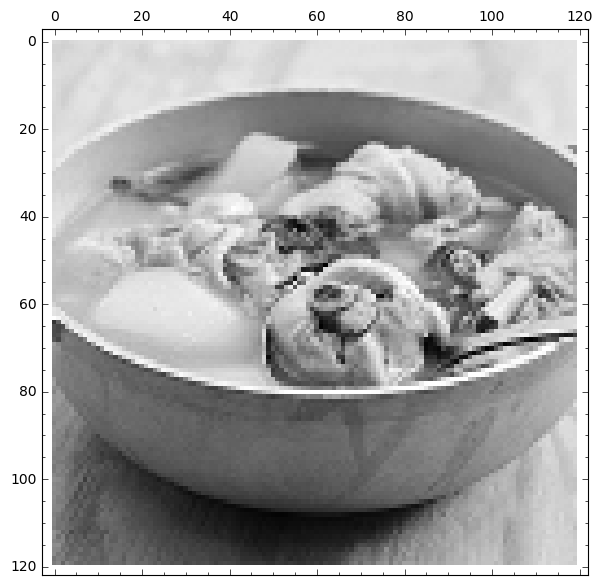

In [2]:
img.plot(cmap="gray")

## Pre-processing
A way to encode the pixels of an image is to group them into blocks of $n$, done per row. Each block $\texttt{plainm}$ consists of the bitwise concatenation of pixels $p_1, p_2, \ldots, p_n$. This can be done by supposing $\texttt{plainm}$ to be a base-$256$ integer, whose digits comprise of $p_1, p_2, \ldots, p_n$.

$$ \texttt{plainm} = \left(p_1 p_2 \cdots p_n\right)_{256} $$

The `polyeval` function converts a block of pixels into a base-$256$ integer.

In [3]:
def polyeval(P, x):
    return sum([b*x^a for a,b in enumerate(reversed(P))])

The `img2blocks` function simply applies `polyeval` to each block. This outputs a list of integers.

In [4]:
def img2blocks(img, bsize):
    plainms = []
    for i in range(img.dimensions()[0]):
        for j in range(0, img.dimensions()[1], bsize):
            blk = map(Integer, img[i][j:j+bsize])
            plainm = polyeval(blk, 256)
            plainms += [plainm]
    return plainms

The `find_y` function finds the corresponding $y$-coordinate in the elliptic curve for $\texttt{plainm}$, as described in Li, et al.

In [5]:
def find_y(plainm):
    for j in range(1,L+1):
        x = plainm*L+j
        y = None
        try:
            y = E.lift_x(x)
            if y != None:
                return y
                break
        except Exception:
            continue

The `img2pts` function converts the image into points on the elliptic curve.

In [6]:
def img2pts(img, bsize):
    plainms = img2blocks(img, bsize)
    imgpts = [find_y(plainm) for plainm in plainms]
    return imgpts

To ensure even distribution, the block size should preferably be a divisor of the image width. In this case, $10$ is a divisor of $120$.

In [7]:
blksize = 10

The size of the finite field should accommodate the largest possible value of $\texttt{plainm}$.

In [8]:
L = 30
p = 256
q = next_prime(polyeval([255]*blksize,p)*L)
q

36267774588438875241185317

In [9]:
F = GF(q)
a, b = F.random_element(), F.random_element()
E = EllipticCurve(F, [a,b])
E

Elliptic Curve defined by y^2 = x^3 + 25160926830695707628774960*x + 3964267901532285194737153 over Finite Field of size 36267774588438875241185317

### Example

In [10]:
imgpts = img2pts(img, blksize)
print(imgpts[0:5]) # get first 5 blocks

[(30862047386388785650466763 : 20936675283702186638417938 : 1), (31004280455606432039952842 : 496515152633646814864913 : 1), (31005398145086891220440733 : 8548147218061616471920464 : 1), (32002093038066725527571194 : 22606861035302863394835137 : 1), (30297600932211038015092771 : 25563232333296339240916887 : 1)]


## Elliptic curve ElGamal

### Key generation

In [11]:
def keygen():
    priv = F.random_element()
    e1 = E.random_point()
    e2 = Integer(priv)*e1
    pub = (e1, e2)
    return (priv, pub)

### Encryption

In [12]:
def encrypt(pts):
    r = F.random_element()
    c1 = Integer(r)*e1
    c2 = [p+Integer(r)*e2 for p in pts]
    return (c1, c2)

### Decryption

In [13]:
def decrypt(enc):
    c1, c2 = enc
    dec = [c-Integer(d)*c1 for c in c2]
    return dec

### Example

In [14]:
d, (e1, e2) = keygen()
print(d)      # private key
print(e1, e2) # public key

4501846952307854917904291
((16007461196869539730418217 : 24335019494172525917003736 : 1), (8544851593863094553103406 : 27572973255699234945885850 : 1))


In [15]:
%%time
enc = encrypt(imgpts)
print(enc[1][0:5])

[(33156431824380619956536885 : 8244916424663876771033709 : 1), (1809656631982192129699795 : 26493940612812258318584766 : 1), (34128544761047791550929205 : 24831564317085600944054137 : 1), (7250956886992492640300490 : 19150238088734884193146616 : 1), (2534238611111608246437534 : 7302637183418653220256282 : 1)]
CPU times: user 7.92 s, sys: 6.21 ms, total: 7.93 s
Wall time: 8.15 s


In [16]:
%%time
dec = decrypt(enc)
print(dec[0:5])

[(30862047386388785650466763 : 20936675283702186638417938 : 1), (31004280455606432039952842 : 496515152633646814864913 : 1), (31005398145086891220440733 : 8548147218061616471920464 : 1), (32002093038066725527571194 : 22606861035302863394835137 : 1), (30297600932211038015092771 : 25563232333296339240916887 : 1)]
CPU times: user 6.81 s, sys: 18.1 ms, total: 6.83 s
Wall time: 6.88 s


## Post-processing

The `int2block` function converts a base-$256$ integer into a list of integers (or pixel values). This is essentially the inverse of the `polyeval` function.

In [17]:
def int2block(n, x, bsize):
    P = []
    for _ in range(bsize):
        P += [Integer(n%x)]
        n = Integer(n//x)
    return P[::-1]

The `blocks2img` function decodes the list of points of the elliptic curve back into an array of pixel values.

In [18]:
def blocks2img(imgpts, bsize, dim):
    plainms = [(Integer(pt[0]))//L for pt in imgpts]
    dec = [int2block(plainm, p, bsize) for plainm in plainms]
    lst = [_ for l in dec for _ in l]
    imgd = Matrix(IntegerModRing(256), dim[0], dim[1], lst)
    return imgd

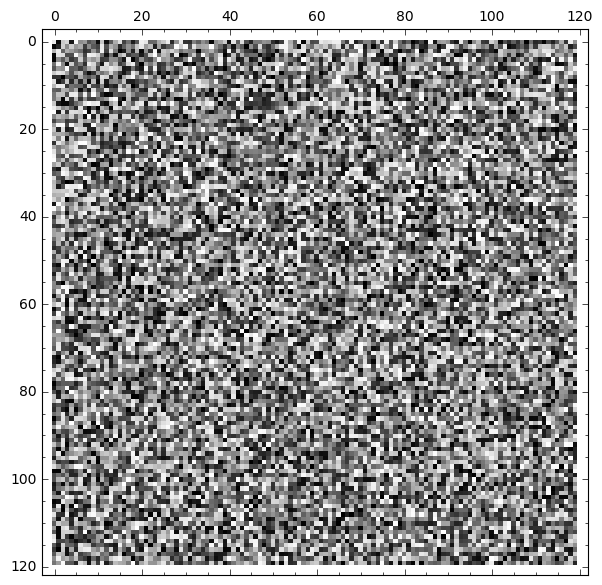

In [19]:
encimg = blocks2img(enc[1], blksize, (120,120))
encimg.plot(cmap="gray")

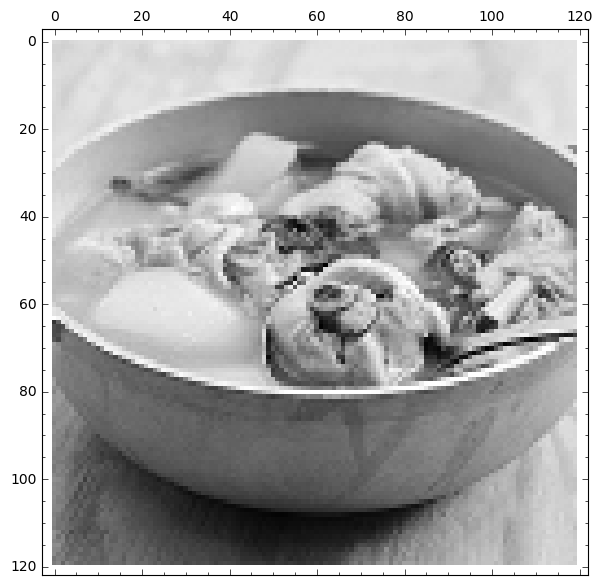

In [20]:
decimg = blocks2img(dec, blksize, (120,120))
decimg.plot(cmap="gray")

In [21]:
img == decimg

True

## Implementing the homomorphic image encryption scheme

In [22]:
p1 = img     # use the same image as before

In [23]:
p2lst = [[206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 207, 207, 207, 207, 207, 207, 207, 207, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 206, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 251, 251, 251, 251, 251, 251, 251, 251, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254], [253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 253, 253, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 253, 253, 253, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 253, 253, 253, 253, 254, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 253, 253, 252, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 253, 253, 252, 253, 253, 252, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 253, 253, 252, 252, 253, 252, 252, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 253, 254, 253, 252, 252, 253, 254, 254, 254, 254, 254, 251, 252, 254, 253, 253, 254, 253, 254, 254, 255, 254, 254, 254, 254, 253, 253, 254, 255, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 252, 252, 252, 252, 253, 253, 253, 254, 254, 254, 255, 255, 254, 253, 253, 253, 254, 253, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 253, 253, 253, 254, 253, 252, 253, 254, 254, 251, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 253, 253, 254, 253, 254, 254, 254, 253, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 253, 251, 254, 254, 254, 252, 253, 254, 255, 254, 254, 254, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 252, 251, 250, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 249, 249, 249, 249, 250, 250, 250, 250, 250, 251, 252, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 253, 254, 253, 254, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 255, 254, 253, 252, 252, 253, 255, 252, 253, 254, 255, 251, 251, 254, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 252, 251, 250, 249, 246, 246, 246, 246, 246, 246, 246, 246, 247, 246, 246, 246, 246, 246, 246, 247, 248, 248, 248, 249, 249, 251, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 254, 253, 253, 254, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 249, 246, 245, 246, 248, 254, 253, 251, 253, 255, 254, 252, 249, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 251, 250, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 247, 248, 248, 248, 248, 248, 247, 246, 247, 248, 250, 251, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 253, 253, 253, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 247, 240, 234, 231, 232, 234, 239, 251, 253, 254, 251, 254, 254, 252, 253, 253, 253, 253, 252, 253, 252, 251, 251, 250, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 249, 248, 246, 246, 246, 247, 247, 251, 252, 252, 252, 253, 253, 253, 252, 252, 252, 252, 252, 251, 251, 251, 251, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 249, 241, 231, 222, 217, 215, 216, 231, 247, 254, 251, 249, 253, 255, 254, 253, 253, 252, 251, 250, 250, 250, 248, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 248, 248, 248, 248, 249, 249, 250, 250, 249, 248, 247, 247, 246, 246, 249, 249, 250, 251, 252, 252, 253, 253, 252, 252, 252, 251, 250, 250, 251, 252, 251, 251, 251, 251, 252, 252, 252, 252, 252, 253, 253, 254, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 253, 253, 249, 237, 222, 209, 202, 206, 202, 216, 245, 253, 251, 247, 253, 254, 253, 253, 251, 250, 249, 248, 247, 246, 247, 248, 248, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250, 248, 248, 249, 250, 249, 249, 248, 247, 246, 247, 248, 249, 251, 252, 253, 253, 251, 252, 252, 252, 252, 252, 252, 252, 250, 249, 249, 250, 250, 252, 252, 252, 252, 252, 253, 253, 254, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 251, 251, 251, 253, 253, 242, 217, 193, 196, 204, 170, 169, 232, 252, 244, 255, 254, 251, 249, 247, 248, 250, 246, 246, 246, 247, 248, 249, 250, 250, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 251, 248, 249, 251, 246, 244, 247, 248, 250, 245, 247, 247, 248, 244, 252, 248, 248, 253, 244, 245, 251, 248, 249, 250, 249, 250, 248, 247, 250, 253, 254, 252, 252, 248, 254, 255, 249, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 251, 251, 252, 253, 253, 251, 241, 228, 177, 164, 180, 182, 167, 202, 248, 249, 251, 245, 247, 251, 242, 240, 251, 245, 247, 248, 248, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 246, 248, 251, 251, 251, 251, 250, 247, 250, 250, 242, 249, 244, 244, 251, 251, 251, 238, 142, 113, 132, 144, 154, 179, 183, 207, 220, 219, 219, 233, 237, 241, 253, 245, 253, 254, 254, 249, 253], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 254, 253, 251, 251, 252, 252, 251, 233, 183, 154, 163, 165, 157, 183, 229, 248, 243, 246, 245, 250, 251, 241, 252, 248, 248, 248, 248, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 250, 249, 245, 246, 248, 244, 247, 243, 251, 247, 246, 248, 247, 240, 246, 243, 247, 241, 179, 103, 116, 93, 95, 98, 99, 94, 107, 98, 91, 89, 101, 230, 254, 253, 252, 254, 254, 254], [254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 254, 253, 251, 250, 250, 252, 251, 251, 240, 197, 163, 162, 166, 164, 165, 203, 245, 245, 243, 250, 249, 251, 245, 249, 249, 248, 248, 248, 248, 247, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 247, 249, 251, 248, 249, 249, 246, 246, 250, 249, 243, 250, 243, 242, 248, 249, 232, 202, 138, 99, 114, 101, 103, 108, 105, 108, 108, 107, 109, 111, 105, 133, 253, 253, 248, 253, 254, 254, 251], [253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 251, 252, 252, 252, 252, 252, 252, 251, 244, 252, 247, 211, 171, 161, 165, 165, 164, 188, 236, 246, 243, 246, 242, 251, 249, 249, 248, 248, 248, 248, 248, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 251, 245, 246, 251, 251, 250, 247, 242, 248, 240, 245, 247, 241, 239, 242, 209, 128, 87, 69, 106, 107, 106, 113, 114, 108, 111, 105, 109, 112, 109, 102, 108, 159, 249, 247, 254, 254, 245, 251, 255], [253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 253, 253, 253, 252, 252, 251, 247, 243, 244, 246, 227, 179, 156, 170, 160, 162, 174, 221, 243, 241, 248, 250, 249, 249, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 251, 248, 249, 249, 245, 245, 249, 249, 245, 246, 245, 243, 226, 154, 94, 67, 73, 79, 68, 72, 105, 115, 108, 102, 109, 112, 107, 102, 105, 112, 108, 99, 195, 252, 250, 253, 253, 254, 254, 252], [253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 253, 252, 250, 248, 248, 248, 248, 244, 242, 249, 250, 245, 241, 206, 148, 166, 166, 161, 161, 203, 242, 245, 245, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 247, 248, 249, 247, 245, 248, 248, 240, 243, 220, 162, 83, 71, 78, 72, 82, 76, 67, 81, 93, 102, 110, 107, 106, 112, 96, 115, 112, 103, 100, 118, 96, 219, 246, 252, 254, 254, 251, 251, 253], [253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 252, 252, 251, 250, 249, 247, 246, 246, 247, 246, 248, 246, 244, 248, 242, 221, 165, 163, 165, 163, 158, 187, 231, 243, 246, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 247, 244, 241, 245, 244, 222, 183, 112, 67, 59, 96, 187, 165, 66, 69, 74, 76, 78, 109, 104, 109, 103, 108, 112, 104, 96, 103, 169, 113, 87, 117, 236, 250, 254, 250, 254, 254, 252, 255], [247, 251, 252, 254, 251, 251, 253, 252, 253, 253, 253, 252, 252, 252, 253, 253, 252, 252, 253, 253, 254, 254, 254, 254, 254, 254, 253, 253, 253, 254, 255, 254, 251, 250, 249, 247, 246, 246, 245, 245, 248, 248, 248, 248, 248, 248, 247, 246, 236, 186, 155, 168, 169, 157, 157, 207, 243, 249, 243, 245, 250, 249, 247, 250, 251, 247, 250, 250, 249, 242, 251, 243, 249, 246, 248, 249, 249, 248, 251, 247, 249, 245, 244, 238, 192, 128, 71, 60, 64, 152, 131, 51, 201, 227, 201, 129, 61, 71, 101, 113, 108, 104, 106, 95, 81, 141, 210, 237, 245, 232, 171, 130, 249, 251, 254, 248, 251, 254, 255, 251], [214, 240, 252, 251, 249, 254, 246, 250, 253, 252, 252, 252, 252, 252, 251, 252, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 250, 249, 248, 248, 248, 248, 248, 248, 248, 247, 248, 248, 248, 248, 248, 248, 248, 248, 249, 238, 194, 133, 157, 140, 119, 120, 159, 233, 249, 238, 247, 245, 249, 246, 245, 245, 251, 242, 246, 252, 245, 251, 245, 249, 250, 243, 242, 246, 245, 246, 240, 211, 139, 87, 63, 82, 87, 184, 142, 99, 216, 147, 77, 213, 138, 236, 198, 108, 113, 104, 114, 127, 85, 136, 226, 246, 248, 243, 247, 248, 245, 233, 241, 251, 245, 251, 251, 250, 251, 250], [212, 199, 231, 250, 252, 249, 252, 254, 253, 253, 253, 254, 255, 254, 253, 253, 255, 254, 253, 253, 252, 252, 252, 253, 253, 252, 252, 251, 250, 248, 247, 246, 246, 247, 247, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 244, 249, 245, 220, 134, 128, 125, 134, 114, 140, 218, 247, 250, 246, 246, 247, 246, 250, 245, 244, 249, 237, 252, 245, 250, 244, 249, 242, 248, 237, 213, 148, 79, 55, 81, 107, 69, 207, 172, 116, 236, 227, 201, 235, 166, 141, 240, 172, 123, 172, 81, 92, 80, 65, 66, 70, 86, 129, 148, 146, 125, 98, 91, 82, 80, 112, 151, 149, 149, 183, 173, 185], [191, 203, 169, 233, 245, 252, 251, 255, 252, 252, 252, 253, 253, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 254, 252, 249, 247, 245, 246, 246, 247, 247, 247, 247, 247, 248, 249, 249, 248, 249, 249, 249, 249, 249, 249, 249, 249, 251, 240, 250, 246, 235, 150, 111, 123, 134, 110, 115, 181, 239, 246, 245, 240, 247, 241, 250, 250, 251, 247, 248, 248, 238, 247, 241, 240, 178, 100, 76, 61, 110, 115, 98, 223, 135, 71, 182, 188, 109, 219, 120, 166, 236, 165, 181, 84, 100, 138, 111, 65, 70, 72, 68, 69, 63, 64, 54, 55, 63, 69, 75, 70, 64, 62, 60, 59, 63, 59, 54, 59], [185, 166, 169, 158, 206, 249, 239, 250, 251, 251, 251, 250, 252, 253, 252, 253, 253, 253, 254, 254, 254, 253, 252, 251, 251, 250, 248, 246, 246, 246, 248, 249, 248, 248, 248, 247, 247, 248, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 251, 246, 245, 241, 238, 185, 109, 126, 117, 126, 116, 149, 222, 233, 243, 241, 244, 247, 247, 241, 248, 243, 242, 239, 195, 133, 73, 51, 69, 75, 193, 222, 178, 109, 83, 200, 174, 61, 182, 184, 88, 217, 122, 72, 92, 107, 187, 231, 128, 61, 73, 61, 53, 71, 65, 62, 61, 68, 66, 62, 62, 60, 62, 56, 77, 68, 67, 66, 73, 68, 63], [241, 187, 163, 169, 158, 197, 251, 252, 252, 253, 253, 253, 251, 253, 254, 253, 253, 254, 254, 254, 253, 251, 249, 248, 246, 247, 248, 248, 249, 249, 249, 248, 249, 248, 247, 248, 248, 249, 249, 250, 249, 249, 249, 249, 249, 248, 247, 249, 247, 251, 249, 248, 247, 248, 243, 220, 121, 132, 133, 109, 90, 87, 87, 103, 131, 127, 141, 159, 183, 201, 208, 135, 69, 67, 64, 118, 203, 138, 51, 185, 199, 52, 176, 229, 111, 178, 197, 221, 223, 68, 70, 97, 165, 221, 237, 242, 185, 56, 68, 49, 67, 69, 66, 65, 67, 59, 70, 66, 63, 67, 62, 67, 82, 232, 115, 59, 60, 168, 214, 61], [249, 245, 189, 152, 176, 155, 179, 244, 248, 252, 254, 254, 253, 253, 254, 254, 253, 253, 252, 251, 250, 249, 248, 247, 246, 247, 248, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 249, 249, 248, 248, 248, 248, 248, 247, 246, 247, 248, 250, 246, 247, 252, 243, 245, 241, 230, 102, 94, 102, 104, 107, 107, 106, 169, 156, 157, 100, 75, 87, 91, 71, 85, 68, 89, 93, 229, 207, 198, 103, 171, 201, 119, 126, 240, 96, 94, 107, 73, 133, 214, 233, 242, 246, 241, 245, 244, 212, 160, 91, 56, 56, 63, 71, 62, 59, 64, 65, 59, 61, 65, 66, 78, 239, 111, 61, 51, 164, 211, 56], [246, 251, 244, 219, 152, 171, 174, 172, 239, 246, 252, 252, 251, 251, 252, 252, 252, 251, 249, 248, 247, 247, 247, 249, 248, 248, 247, 247, 247, 248, 249, 250, 248, 248, 249, 249, 249, 248, 247, 247, 248, 248, 248, 248, 248, 247, 247, 247, 246, 251, 247, 250, 248, 247, 250, 242, 237, 99, 71, 70, 102, 101, 107, 98, 118, 171, 108, 86, 83, 113, 108, 168, 216, 117, 114, 107, 140, 208, 166, 243, 174, 131, 192, 201, 110, 92, 123, 187, 238, 243, 240, 244, 244, 250, 248, 245, 240, 250, 245, 239, 200, 129, 74, 58, 65, 67, 67, 72, 64, 60, 72, 67, 75, 241, 111, 55, 56, 170, 218, 45], [252, 248, 253, 251, 213, 169, 158, 167, 161, 223, 248, 247, 248, 251, 251, 249, 246, 244, 247, 241, 246, 251, 247, 248, 248, 248, 248, 248, 249, 249, 249, 249, 248, 248, 248, 249, 249, 249, 249, 249, 250, 249, 250, 249, 248, 251, 250, 246, 249, 246, 251, 248, 246, 248, 241, 246, 237, 112, 86, 154, 146, 126, 109, 125, 105, 91, 124, 160, 164, 111, 104, 106, 156, 226, 120, 100, 84, 193, 243, 125, 167, 132, 77, 105, 168, 141, 159, 245, 181, 244, 194, 218, 211, 131, 194, 248, 235, 170, 244, 235, 172, 250, 188, 168, 101, 56, 66, 64, 66, 61, 72, 63, 76, 242, 179, 137, 110, 158, 217, 52], [253, 254, 247, 246, 252, 218, 164, 157, 165, 157, 219, 250, 250, 251, 240, 249, 248, 244, 251, 250, 248, 247, 243, 249, 248, 247, 247, 248, 249, 249, 249, 249, 248, 248, 249, 249, 249, 248, 248, 248, 249, 247, 248, 249, 248, 251, 252, 248, 249, 249, 246, 246, 247, 248, 249, 246, 241, 125, 113, 159, 163, 111, 121, 114, 162, 105, 211, 203, 153, 222, 168, 96, 100, 124, 227, 181, 229, 196, 170, 87, 99, 136, 211, 245, 121, 144, 132, 200, 77, 238, 113, 189, 61, 171, 118, 233, 154, 39, 200, 232, 25, 195, 77, 241, 174, 48, 119, 105, 48, 57, 68, 73, 84, 190, 191, 189, 147, 127, 165, 52], [252, 251, 254, 252, 246, 253, 229, 168, 163, 162, 159, 196, 239, 247, 246, 241, 248, 241, 245, 248, 248, 250, 248, 250, 249, 249, 249, 249, 249, 248, 248, 248, 249, 249, 249, 248, 247, 247, 247, 247, 248, 247, 251, 252, 248, 246, 246, 244, 243, 250, 248, 249, 246, 241, 246, 242, 208, 121, 122, 100, 109, 120, 203, 227, 236, 133, 167, 220, 93, 93, 228, 159, 89, 105, 119, 195, 119, 67, 108, 176, 234, 242, 246, 242, 202, 93, 100, 222, 95, 232, 119, 185, 165, 74, 117, 243, 85, 177, 122, 217, 109, 105, 111, 228, 94, 177, 117, 241, 208, 100, 68, 64, 60, 40, 35, 27, 34, 56, 40, 66], [254, 247, 251, 254, 250, 252, 248, 231, 168, 163, 169, 146, 179, 237, 239, 250, 249, 248, 250, 249, 249, 251, 250, 244, 249, 249, 249, 249, 249, 248, 248, 248, 249, 249, 248, 247, 247, 247, 247, 248, 250, 245, 245, 249, 251, 251, 250, 246, 250, 248, 240, 245, 244, 223, 175, 126, 109, 107, 107, 105, 106, 106, 150, 121, 214, 169, 66, 167, 212, 162, 213, 225, 79, 104, 85, 73, 77, 203, 240, 240, 242, 246, 247, 247, 131, 201, 134, 150, 84, 190, 99, 185, 113, 203, 80, 185, 65, 86, 54, 210, 100, 146, 42, 205, 51, 94, 48, 219, 242, 183, 59, 69, 69, 68, 115, 204, 202, 185, 117, 97], [253, 254, 249, 251, 252, 251, 244, 249, 237, 163, 119, 138, 119, 146, 235, 243, 244, 248, 249, 249, 247, 247, 249, 247, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 247, 247, 247, 248, 249, 249, 249, 249, 250, 248, 243, 243, 245, 244, 243, 243, 231, 180, 121, 92, 91, 109, 114, 110, 110, 113, 114, 121, 108, 103, 100, 193, 210, 85, 104, 151, 158, 85, 100, 134, 139, 86, 79, 228, 240, 246, 249, 248, 249, 251, 206, 106, 114, 237, 195, 96, 138, 243, 177, 112, 145, 178, 202, 245, 167, 210, 168, 249, 122, 193, 186, 249, 171, 208, 249, 247, 214, 84, 52, 55, 152, 233, 89, 192, 219, 100], [251, 249, 253, 251, 242, 250, 251, 237, 239, 239, 178, 118, 130, 117, 129, 227, 245, 249, 244, 245, 249, 245, 248, 251, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 248, 248, 248, 248, 249, 249, 247, 245, 246, 244, 244, 245, 240, 230, 199, 153, 113, 88, 97, 116, 109, 107, 99, 114, 103, 116, 115, 102, 108, 113, 108, 88, 187, 150, 105, 113, 94, 115, 104, 209, 176, 79, 62, 221, 249, 247, 246, 240, 249, 247, 248, 246, 252, 236, 246, 252, 250, 240, 249, 241, 249, 249, 242, 250, 239, 247, 245, 243, 246, 252, 252, 237, 252, 247, 237, 251, 244, 235, 144, 58, 150, 244, 191, 239, 128, 104], [249, 247, 246, 249, 249, 242, 241, 249, 249, 241, 241, 157, 96, 126, 124, 128, 212, 243, 247, 247, 250, 249, 248, 248, 248, 248, 248, 249, 249, 250, 250, 249, 248, 248, 248, 248, 248, 248, 248, 248, 249, 248, 247, 244, 236, 217, 169, 121, 121, 115, 112, 109, 106, 104, 104, 109, 107, 105, 113, 105, 107, 114, 105, 107, 115, 111, 92, 98, 118, 87, 103, 109, 114, 71, 105, 108, 80, 214, 240, 246, 249, 251, 244, 247, 220, 242, 233, 231, 242, 229, 221, 247, 227, 247, 236, 217, 238, 251, 237, 237, 237, 239, 228, 224, 221, 251, 218, 229, 246, 244, 241, 248, 241, 158, 143, 226, 118, 237, 105, 101], [247, 252, 248, 245, 250, 250, 247, 249, 249, 249, 246, 241, 181, 108, 111, 122, 108, 196, 241, 244, 246, 247, 249, 246, 248, 248, 248, 249, 249, 250, 250, 250, 249, 249, 249, 248, 248, 247, 247, 247, 245, 243, 221, 167, 117, 103, 111, 116, 125, 117, 103, 109, 112, 105, 109, 106, 107, 100, 108, 109, 103, 112, 107, 96, 88, 96, 105, 171, 200, 180, 115, 103, 109, 113, 97, 104, 87, 206, 245, 246, 246, 248, 250, 249, 143, 200, 199, 131, 128, 99, 116, 197, 88, 226, 83, 108, 77, 201, 90, 250, 122, 177, 100, 65, 140, 154, 99, 73, 210, 245, 248, 246, 242, 90, 140, 229, 51, 194, 218, 114], [249, 249, 248, 248, 248, 248, 249, 249, 248, 247, 249, 246, 241, 183, 108, 124, 112, 107, 187, 240, 242, 251, 243, 250, 250, 249, 249, 246, 247, 250, 247, 247, 246, 250, 251, 248, 247, 249, 242, 226, 180, 125, 100, 102, 112, 112, 120, 112, 120, 103, 108, 106, 105, 108, 106, 107, 108, 107, 111, 102, 106, 70, 113, 168, 202, 154, 119, 97, 75, 91, 106, 112, 113, 108, 111, 107, 86, 164, 238, 247, 245, 251, 245, 248, 131, 120, 123, 124, 116, 120, 129, 215, 81, 174, 142, 228, 183, 216, 58, 142, 56, 204, 224, 89, 248, 139, 96, 157, 232, 245, 244, 245, 239, 77, 61, 57, 60, 54, 68, 57], [249, 249, 249, 248, 248, 248, 249, 249, 251, 249, 251, 240, 242, 248, 200, 107, 104, 100, 100, 172, 236, 245, 242, 246, 246, 248, 247, 247, 246, 247, 251, 251, 250, 243, 243, 244, 231, 192, 143, 107, 100, 102, 103, 104, 118, 113, 113, 117, 104, 108, 104, 109, 109, 107, 94, 111, 103, 105, 86, 110, 167, 217, 230, 242, 240, 242, 241, 234, 221, 189, 144, 118, 108, 102, 106, 115, 103, 84, 122, 226, 246, 242, 251, 249, 126, 160, 163, 125, 105, 167, 189, 234, 77, 169, 134, 182, 56, 188, 68, 198, 97, 189, 233, 79, 251, 184, 199, 99, 170, 247, 245, 242, 196, 69, 67, 60, 62, 67, 57, 68], [249, 249, 249, 249, 248, 248, 248, 248, 245, 246, 249, 251, 244, 247, 245, 217, 99, 78, 72, 62, 136, 220, 233, 237, 236, 242, 242, 246, 245, 244, 246, 241, 248, 234, 202, 157, 116, 99, 101, 104, 109, 101, 114, 114, 101, 102, 115, 106, 105, 117, 106, 108, 103, 112, 114, 98, 112, 149, 210, 241, 240, 222, 214, 213, 232, 247, 247, 239, 244, 243, 244, 246, 231, 199, 90, 102, 103, 89, 89, 83, 194, 244, 244, 247, 134, 195, 200, 135, 130, 102, 113, 178, 85, 224, 95, 118, 77, 206, 89, 250, 120, 199, 228, 93, 251, 140, 85, 78, 198, 243, 245, 232, 80, 60, 60, 73, 72, 71, 69, 62], [249, 249, 249, 249, 248, 248, 248, 248, 248, 251, 241, 247, 252, 246, 240, 249, 172, 97, 108, 98, 88, 104, 123, 123, 121, 139, 148, 176, 198, 209, 226, 221, 155, 127, 112, 115, 112, 103, 105, 112, 107, 110, 106, 100, 105, 107, 106, 106, 111, 99, 118, 105, 98, 96, 119, 188, 231, 230, 232, 216, 201, 207, 205, 200, 207, 235, 246, 248, 251, 248, 247, 241, 243, 248, 224, 114, 95, 103, 101, 96, 93, 149, 231, 246, 228, 247, 243, 242, 235, 239, 235, 235, 241, 245, 235, 232, 244, 238, 231, 247, 244, 239, 245, 245, 244, 243, 229, 231, 247, 247, 242, 229, 60, 64, 70, 61, 56, 69, 61, 63], [248, 248, 248, 248, 248, 249, 249, 249, 245, 251, 252, 248, 245, 246, 242, 241, 135, 101, 98, 115, 123, 125, 110, 155, 153, 137, 108, 106, 97, 84, 101, 110, 106, 119, 127, 119, 108, 110, 111, 105, 103, 103, 100, 106, 112, 107, 103, 113, 113, 87, 84, 117, 173, 229, 247, 244, 223, 203, 205, 203, 210, 213, 203, 212, 211, 207, 229, 243, 244, 246, 252, 243, 251, 240, 247, 238, 172, 73, 101, 106, 117, 91, 107, 219, 250, 243, 244, 246, 251, 241, 242, 248, 248, 239, 246, 247, 245, 250, 249, 241, 245, 248, 243, 243, 244, 241, 250, 247, 248, 244, 248, 242, 215, 151, 89, 57, 59, 68, 68, 65], [248, 248, 248, 249, 249, 249, 249, 249, 252, 242, 244, 245, 245, 250, 248, 243, 118, 104, 138, 177, 112, 133, 121, 114, 205, 218, 184, 130, 102, 110, 119, 99, 112, 106, 107, 110, 104, 101, 104, 108, 104, 111, 114, 108, 99, 112, 105, 81, 90, 157, 202, 240, 238, 229, 152, 110, 196, 183, 187, 208, 152, 181, 140, 127, 176, 156, 200, 217, 223, 210, 240, 251, 242, 251, 251, 242, 242, 206, 99, 104, 109, 109, 110, 87, 161, 245, 242, 243, 242, 241, 206, 105, 109, 174, 146, 217, 150, 208, 142, 147, 118, 116, 181, 251, 249, 246, 242, 250, 247, 237, 251, 244, 244, 245, 239, 211, 149, 77, 65, 46], [248, 249, 249, 249, 249, 249, 249, 249, 246, 251, 251, 251, 249, 245, 242, 229, 125, 116, 166, 242, 163, 108, 125, 114, 80, 87, 97, 107, 107, 103, 105, 110, 104, 108, 110, 106, 105, 111, 112, 104, 104, 113, 104, 103, 96, 92, 126, 200, 235, 230, 227, 220, 208, 183, 66, 153, 128, 145, 138, 203, 83, 150, 113, 174, 194, 90, 195, 211, 148, 135, 248, 240, 250, 244, 249, 250, 246, 245, 233, 137, 85, 117, 103, 119, 83, 139, 232, 243, 246, 247, 158, 132, 201, 230, 186, 65, 105, 224, 69, 238, 102, 170, 233, 250, 249, 249, 250, 249, 244, 251, 249, 249, 249, 239, 250, 243, 245, 241, 212, 195], [247, 248, 249, 249, 249, 249, 249, 249, 250, 250, 242, 251, 249, 244, 246, 215, 90, 107, 200, 236, 203, 142, 117, 107, 110, 108, 109, 105, 106, 110, 106, 105, 108, 105, 107, 109, 106, 106, 107, 108, 108, 103, 92, 114, 164, 227, 240, 238, 222, 216, 205, 206, 198, 206, 112, 76, 152, 143, 76, 77, 82, 145, 65, 75, 177, 79, 197, 203, 165, 121, 233, 248, 240, 247, 246, 246, 247, 242, 246, 242, 184, 99, 114, 103, 106, 124, 106, 210, 242, 243, 165, 77, 124, 184, 238, 43, 160, 227, 71, 247, 120, 190, 248, 243, 248, 250, 250, 245, 251, 247, 243, 250, 248, 250, 246, 249, 249, 245, 246, 249], [249, 247, 251, 250, 251, 247, 246, 249, 252, 246, 245, 250, 249, 246, 246, 183, 98, 100, 163, 113, 116, 111, 111, 106, 105, 110, 106, 107, 109, 105, 112, 104, 107, 103, 106, 112, 110, 106, 102, 95, 103, 150, 207, 240, 246, 240, 221, 203, 211, 193, 207, 205, 213, 178, 128, 186, 67, 151, 133, 198, 84, 145, 130, 185, 198, 80, 166, 182, 150, 112, 188, 212, 238, 245, 248, 249, 244, 248, 242, 248, 243, 218, 132, 113, 124, 117, 126, 104, 172, 242, 151, 125, 178, 203, 127, 139, 79, 193, 66, 253, 111, 193, 245, 244, 249, 249, 249, 249, 249, 249, 248, 248, 246, 246, 247, 248, 248, 247, 247, 247], [250, 246, 248, 245, 247, 249, 249, 251, 243, 251, 244, 251, 245, 242, 228, 135, 96, 107, 108, 108, 122, 108, 111, 105, 106, 112, 101, 115, 107, 105, 108, 106, 110, 114, 110, 106, 85, 74, 129, 203, 239, 244, 245, 246, 247, 245, 235, 222, 196, 218, 199, 201, 201, 215, 123, 108, 172, 169, 169, 203, 133, 180, 107, 112, 147, 148, 118, 120, 179, 116, 110, 152, 212, 236, 245, 242, 247, 245, 251, 245, 248, 245, 231, 172, 123, 122, 132, 152, 142, 154, 203, 159, 152, 194, 173, 242, 193, 214, 189, 248, 187, 222, 242, 251, 249, 249, 249, 249, 249, 249, 248, 248, 249, 248, 248, 249, 249, 249, 249, 249], [248, 249, 250, 245, 251, 249, 237, 245, 247, 241, 242, 237, 172, 123, 90, 93, 116, 109, 105, 107, 108, 105, 100, 105, 110, 102, 105, 108, 103, 106, 104, 113, 112, 91, 79, 95, 171, 235, 238, 242, 244, 243, 243, 243, 246, 248, 247, 244, 230, 199, 208, 209, 210, 204, 215, 211, 212, 209, 210, 193, 212, 210, 203, 213, 205, 208, 210, 208, 203, 212, 212, 206, 198, 204, 227, 246, 245, 250, 249, 245, 240, 247, 240, 242, 199, 144, 159, 160, 168, 158, 130, 193, 245, 244, 241, 247, 250, 245, 250, 240, 250, 252, 242, 246, 249, 249, 249, 249, 249, 249, 248, 248, 250, 250, 250, 249, 249, 249, 249, 249], [244, 245, 241, 247, 244, 241, 250, 241, 235, 201, 127, 74, 92, 126, 85, 218, 151, 100, 106, 104, 111, 108, 106, 110, 109, 104, 117, 103, 104, 109, 113, 102, 104, 142, 206, 240, 244, 246, 247, 246, 248, 250, 251, 251, 248, 245, 246, 248, 244, 231, 207, 199, 203, 224, 190, 196, 202, 202, 205, 205, 210, 199, 209, 200, 210, 209, 216, 198, 205, 213, 196, 216, 201, 206, 203, 221, 240, 244, 252, 248, 252, 249, 251, 242, 245, 226, 155, 134, 161, 163, 159, 135, 164, 230, 241, 249, 241, 250, 244, 249, 251, 249, 245, 248, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249], [190, 212, 223, 222, 234, 236, 215, 153, 88, 79, 113, 154, 108, 179, 212, 220, 220, 83, 111, 118, 100, 107, 107, 107, 102, 113, 102, 105, 109, 113, 102, 97, 182, 243, 243, 242, 248, 242, 251, 247, 248, 245, 244, 245, 247, 247, 249, 250, 248, 248, 208, 73, 89, 126, 135, 71, 84, 179, 105, 96, 186, 93, 69, 127, 124, 175, 105, 81, 82, 184, 101, 130, 165, 132, 240, 243, 250, 244, 245, 246, 248, 244, 243, 251, 243, 246, 244, 179, 137, 175, 160, 144, 152, 140, 220, 241, 249, 244, 244, 249, 245, 243, 249, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249], [72, 70, 94, 79, 106, 93, 77, 103, 165, 94, 181, 236, 207, 121, 97, 158, 232, 143, 87, 97, 108, 108, 103, 104, 111, 97, 80, 105, 141, 78, 119, 100, 92, 169, 239, 245, 240, 249, 248, 246, 247, 246, 247, 250, 251, 250, 247, 245, 245, 242, 209, 74, 129, 197, 217, 90, 200, 204, 91, 98, 193, 202, 89, 217, 102, 151, 84, 220, 168, 109, 109, 69, 174, 127, 249, 242, 244, 251, 248, 249, 249, 251, 243, 249, 251, 237, 245, 247, 204, 123, 166, 172, 165, 161, 143, 196, 230, 248, 247, 242, 250, 250, 249, 247, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249], [208, 163, 110, 115, 90, 83, 215, 147, 175, 197, 66, 224, 139, 208, 188, 91, 100, 231, 134, 93, 113, 96, 103, 77, 82, 155, 215, 244, 242, 185, 73, 114, 116, 72, 159, 237, 241, 248, 248, 250, 247, 249, 250, 247, 245, 246, 247, 249, 246, 245, 211, 186, 155, 86, 214, 88, 194, 137, 79, 78, 139, 206, 78, 229, 108, 151, 80, 223, 173, 111, 101, 170, 50, 154, 239, 247, 251, 245, 247, 241, 246, 249, 250, 245, 249, 249, 241, 249, 246, 233, 159, 144, 148, 170, 167, 157, 166, 234, 240, 244, 248, 245, 245, 252, 249, 249, 249, 249, 249, 249, 247, 247, 249, 249, 249, 249, 248, 248, 248, 248], [86, 74, 133, 114, 187, 170, 144, 242, 191, 219, 179, 100, 239, 223, 162, 214, 124, 101, 69, 98, 97, 84, 125, 188, 234, 242, 241, 247, 242, 246, 196, 86, 111, 118, 86, 140, 234, 246, 239, 247, 247, 248, 248, 246, 247, 249, 249, 247, 244, 249, 202, 87, 108, 128, 231, 93, 189, 92, 187, 198, 92, 205, 93, 215, 114, 172, 116, 102, 96, 200, 99, 211, 103, 149, 244, 248, 249, 243, 250, 252, 250, 247, 250, 244, 247, 251, 246, 248, 244, 245, 242, 186, 144, 163, 157, 171, 162, 162, 213, 241, 243, 247, 247, 248, 249, 249, 249, 249, 249, 249, 247, 248, 247, 247, 247, 248, 248, 248, 248, 248], [92, 214, 186, 185, 97, 127, 204, 232, 159, 197, 239, 144, 171, 164, 75, 82, 87, 106, 90, 93, 176, 220, 242, 244, 242, 245, 246, 249, 237, 246, 247, 201, 97, 104, 111, 98, 122, 219, 246, 245, 246, 248, 243, 249, 244, 246, 245, 250, 244, 249, 245, 235, 236, 244, 241, 229, 210, 202, 203, 206, 201, 202, 209, 211, 226, 238, 238, 233, 238, 243, 241, 241, 240, 242, 245, 247, 249, 250, 249, 249, 248, 247, 249, 249, 249, 249, 249, 249, 251, 246, 246, 242, 215, 173, 157, 167, 164, 162, 148, 186, 233, 244, 250, 242, 249, 252, 247, 243, 251, 251, 244, 250, 248, 248, 248, 248, 248, 249, 249, 250], [147, 138, 215, 217, 215, 201, 102, 211, 233, 107, 145, 144, 77, 91, 104, 103, 106, 159, 214, 231, 230, 239, 230, 246, 237, 244, 238, 241, 251, 232, 247, 235, 219, 121, 112, 121, 96, 119, 210, 244, 242, 235, 234, 239, 235, 237, 234, 247, 246, 248, 246, 244, 245, 248, 246, 240, 234, 216, 201, 200, 207, 220, 233, 238, 240, 246, 246, 243, 246, 249, 247, 244, 243, 244, 246, 248, 249, 250, 249, 249, 248, 247, 249, 249, 249, 249, 249, 249, 248, 245, 244, 247, 248, 232, 191, 155, 163, 168, 174, 155, 170, 222, 243, 246, 244, 245, 249, 249, 245, 246, 249, 247, 248, 248, 249, 249, 249, 249, 249, 249], [176, 160, 107, 125, 92, 187, 209, 65, 144, 98, 89, 107, 104, 113, 132, 198, 236, 246, 223, 57, 77, 163, 96, 194, 101, 248, 250, 99, 193, 73, 228, 97, 170, 137, 144, 45, 98, 67, 73, 156, 111, 82, 102, 186, 77, 65, 104, 251, 247, 245, 246, 250, 251, 248, 246, 247, 244, 234, 224, 227, 239, 244, 244, 245, 246, 244, 245, 245, 245, 247, 246, 241, 246, 247, 248, 249, 249, 250, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 248, 252, 250, 242, 243, 246, 235, 213, 161, 158, 162, 161, 162, 167, 193, 239, 249, 246, 246, 247, 246, 250, 251, 246, 247, 248, 249, 250, 250, 249, 248, 247], [152, 162, 222, 136, 200, 192, 114, 88, 99, 111, 102, 99, 187, 228, 250, 244, 249, 240, 222, 69, 158, 210, 89, 207, 78, 246, 243, 81, 202, 37, 148, 103, 208, 85, 194, 69, 78, 76, 86, 124, 61, 138, 180, 245, 202, 101, 251, 245, 247, 246, 247, 251, 251, 246, 245, 247, 250, 249, 245, 245, 249, 249, 245, 250, 249, 245, 247, 251, 248, 248, 250, 246, 248, 249, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 249, 251, 249, 245, 244, 247, 247, 246, 230, 153, 163, 171, 163, 164, 154, 187, 231, 242, 247, 248, 251, 249, 246, 248, 247, 248, 248, 248, 248, 247, 246, 246], [208, 214, 208, 91, 93, 69, 97, 83, 113, 114, 126, 235, 244, 250, 241, 247, 242, 250, 229, 66, 157, 213, 78, 198, 89, 250, 248, 81, 196, 134, 102, 62, 231, 87, 95, 194, 118, 84, 110, 110, 100, 139, 71, 205, 210, 96, 251, 246, 249, 250, 250, 249, 248, 247, 247, 247, 247, 251, 250, 247, 249, 246, 246, 252, 250, 246, 250, 251, 249, 249, 251, 251, 249, 249, 249, 248, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 246, 249, 252, 251, 246, 244, 246, 249, 237, 192, 162, 160, 165, 168, 161, 165, 218, 243, 242, 249, 250, 244, 248, 246, 246, 246, 246, 247, 248, 248, 248], [90, 93, 83, 104, 89, 96, 120, 158, 105, 97, 146, 245, 249, 246, 251, 246, 247, 248, 225, 70, 250, 245, 98, 202, 52, 87, 146, 97, 196, 108, 216, 66, 243, 164, 67, 241, 140, 54, 80, 107, 76, 75, 65, 226, 208, 107, 240, 246, 247, 250, 250, 247, 246, 248, 249, 248, 244, 248, 250, 251, 252, 249, 246, 247, 248, 247, 249, 250, 247, 246, 248, 249, 249, 249, 248, 248, 248, 248, 248, 247, 248, 248, 249, 249, 249, 249, 249, 249, 248, 250, 251, 250, 246, 243, 246, 250, 247, 246, 246, 210, 165, 162, 165, 164, 168, 155, 191, 241, 247, 240, 247, 251, 245, 245, 246, 247, 248, 250, 252, 252], [122, 118, 113, 108, 97, 122, 233, 140, 102, 114, 176, 239, 248, 245, 243, 251, 249, 246, 248, 231, 244, 251, 222, 243, 225, 210, 232, 243, 231, 241, 248, 219, 243, 231, 230, 243, 240, 228, 196, 136, 172, 155, 167, 158, 230, 235, 248, 247, 246, 248, 248, 247, 248, 248, 249, 248, 251, 250, 248, 248, 247, 248, 249, 248, 249, 251, 250, 249, 250, 250, 249, 250, 248, 248, 248, 249, 249, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 248, 248, 247, 246, 250, 251, 250, 246, 245, 250, 244, 245, 230, 183, 160, 161, 171, 189, 177, 180, 227, 249, 243, 249, 248, 249, 250, 251, 252, 253, 254, 254], [105, 121, 112, 99, 106, 79, 126, 108, 99, 99, 204, 247, 246, 243, 252, 244, 250, 244, 251, 247, 247, 246, 249, 249, 246, 250, 245, 243, 250, 244, 247, 245, 245, 249, 245, 247, 245, 246, 243, 224, 162, 162, 163, 159, 169, 228, 237, 247, 248, 247, 247, 249, 250, 250, 249, 249, 247, 245, 249, 251, 247, 249, 249, 246, 248, 251, 248, 244, 250, 250, 246, 247, 248, 248, 249, 249, 249, 249, 249, 249, 248, 248, 249, 249, 249, 249, 249, 249, 247, 250, 251, 249, 247, 247, 248, 249, 246, 244, 247, 246, 247, 239, 204, 182, 206, 184, 197, 199, 178, 209, 250, 246, 252, 253, 254, 254, 254, 254, 253, 253], [148, 103, 108, 109, 108, 113, 79, 105, 117, 103, 232, 247, 246, 246, 249, 247, 249, 249, 249, 249, 249, 249, 248, 248, 248, 250, 202, 110, 106, 173, 164, 212, 167, 207, 151, 167, 116, 107, 175, 245, 230, 165, 154, 170, 163, 137, 212, 242, 242, 250, 243, 252, 249, 249, 248, 249, 249, 250, 251, 245, 249, 246, 250, 246, 246, 246, 250, 249, 247, 250, 246, 249, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 249, 249, 249, 248, 249, 248, 249, 250, 250, 249, 249, 249, 248, 249, 249, 247, 245, 244, 244, 240, 235, 192, 196, 203, 207, 199, 193, 211, 240, 251, 254, 254, 250, 249, 252, 254, 253], [200, 152, 110, 106, 109, 106, 111, 102, 105, 132, 240, 250, 248, 252, 244, 251, 249, 249, 249, 249, 249, 249, 248, 248, 247, 247, 161, 129, 195, 226, 192, 77, 91, 227, 76, 229, 120, 156, 236, 248, 245, 237, 146, 162, 159, 163, 143, 209, 243, 246, 249, 243, 251, 241, 249, 246, 248, 248, 244, 248, 249, 251, 244, 250, 250, 248, 243, 252, 248, 252, 246, 250, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 248, 249, 249, 249, 248, 248, 247, 247, 247, 247, 247, 247, 249, 251, 249, 246, 238, 210, 198, 203, 201, 199, 208, 218, 236, 245, 254, 254, 254, 254, 255, 254], [103, 109, 100, 110, 109, 108, 110, 117, 108, 117, 235, 247, 243, 248, 250, 244, 249, 249, 249, 249, 249, 249, 248, 248, 242, 252, 155, 61, 85, 185, 239, 67, 155, 228, 78, 248, 121, 176, 248, 241, 246, 250, 237, 174, 166, 170, 162, 155, 182, 241, 248, 239, 248, 252, 247, 250, 251, 243, 249, 249, 247, 249, 246, 244, 247, 252, 251, 249, 242, 247, 251, 251, 249, 249, 249, 250, 250, 250, 250, 250, 250, 250, 249, 249, 247, 248, 248, 247, 247, 247, 248, 248, 248, 248, 248, 248, 249, 249, 250, 250, 252, 253, 253, 251, 253, 249, 226, 210, 215, 217, 215, 222, 223, 237, 250, 254, 254, 253, 254, 253], [140, 117, 97, 92, 106, 109, 110, 107, 113, 103, 139, 230, 246, 246, 250, 251, 249, 249, 249, 249, 249, 249, 249, 248, 249, 246, 160, 117, 182, 207, 147, 116, 77, 198, 72, 249, 120, 172, 245, 248, 245, 249, 242, 240, 179, 151, 170, 160, 150, 178, 233, 245, 246, 241, 252, 245, 246, 248, 251, 249, 247, 246, 251, 250, 245, 248, 249, 248, 252, 249, 251, 243, 249, 249, 249, 250, 250, 249, 249, 249, 249, 248, 248, 247, 246, 246, 245, 245, 246, 247, 248, 249, 250, 251, 251, 251, 253, 252, 252, 251, 252, 253, 252, 252, 251, 250, 251, 240, 220, 224, 234, 227, 229, 239, 249, 252, 251, 251, 253, 254], [248, 245, 228, 174, 138, 94, 124, 111, 117, 113, 112, 139, 229, 250, 242, 251, 248, 249, 249, 249, 249, 249, 248, 249, 251, 244, 213, 151, 147, 180, 164, 236, 207, 198, 174, 249, 197, 209, 244, 251, 251, 249, 246, 245, 243, 188, 133, 172, 171, 148, 175, 238, 245, 245, 244, 250, 245, 251, 240, 244, 250, 248, 246, 248, 250, 247, 249, 251, 249, 238, 245, 251, 249, 249, 249, 249, 248, 248, 248, 248, 247, 247, 247, 247, 247, 247, 247, 247, 248, 249, 250, 251, 252, 253, 254, 254, 253, 252, 251, 252, 252, 253, 254, 254, 250, 253, 250, 250, 251, 237, 229, 243, 245, 249, 252, 252, 252, 253, 255, 255], [244, 246, 245, 248, 233, 157, 106, 120, 111, 127, 125, 118, 146, 237, 248, 245, 248, 248, 249, 249, 249, 249, 249, 249, 246, 249, 252, 244, 239, 252, 247, 251, 244, 248, 244, 245, 247, 250, 249, 247, 240, 240, 248, 251, 245, 246, 210, 156, 164, 164, 166, 166, 232, 246, 246, 242, 251, 242, 248, 247, 250, 238, 251, 244, 247, 244, 245, 247, 247, 252, 248, 249, 248, 248, 248, 247, 247, 247, 248, 248, 246, 247, 248, 249, 250, 251, 251, 252, 252, 252, 253, 253, 254, 254, 253, 254, 254, 253, 252, 253, 253, 253, 253, 255, 254, 248, 252, 255, 253, 251, 251, 248, 252, 252, 253, 253, 254, 255, 254, 254], [246, 252, 245, 246, 247, 241, 148, 106, 119, 130, 134, 155, 143, 161, 242, 245, 248, 248, 249, 249, 249, 249, 249, 249, 251, 243, 242, 251, 252, 248, 251, 242, 250, 248, 247, 251, 247, 245, 251, 247, 252, 243, 248, 245, 244, 244, 248, 220, 166, 170, 162, 167, 163, 226, 241, 246, 244, 243, 249, 241, 241, 252, 244, 247, 249, 236, 251, 239, 249, 247, 241, 246, 248, 247, 246, 246, 246, 247, 249, 250, 249, 249, 250, 251, 252, 253, 254, 254, 253, 253, 254, 254, 254, 253, 253, 253, 254, 254, 254, 254, 252, 251, 252, 253, 248, 254, 252, 246, 251, 254, 253, 254, 252, 251, 251, 252, 253, 254, 253, 252], [245, 244, 249, 250, 244, 242, 235, 160, 146, 164, 170, 164, 168, 166, 170, 236, 247, 248, 249, 249, 249, 249, 249, 249, 245, 251, 250, 244, 247, 247, 246, 252, 245, 248, 251, 248, 248, 251, 245, 247, 129, 110, 112, 180, 180, 138, 235, 242, 167, 119, 98, 160, 113, 122, 146, 246, 156, 174, 102, 104, 136, 207, 94, 103, 214, 106, 94, 109, 221, 242, 251, 250, 247, 247, 246, 246, 246, 248, 250, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 251, 252, 254, 254, 252, 253, 254, 254, 251, 252, 253, 252, 251, 253, 254, 252, 251, 251, 252, 253, 253, 254, 255], [247, 209, 232, 237, 167, 189, 243, 233, 150, 134, 160, 167, 164, 161, 161, 175, 232, 248, 245, 251, 250, 250, 243, 249, 249, 250, 247, 245, 251, 242, 249, 248, 246, 251, 244, 252, 248, 247, 248, 246, 85, 194, 212, 152, 150, 87, 221, 245, 150, 152, 69, 93, 106, 149, 55, 212, 80, 193, 94, 200, 209, 132, 112, 164, 199, 232, 69, 222, 249, 244, 248, 248, 248, 252, 250, 246, 252, 254, 253, 254, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254], [200, 96, 204, 94, 138, 107, 173, 249, 238, 168, 155, 160, 163, 156, 169, 143, 171, 234, 249, 237, 247, 251, 245, 249, 242, 248, 250, 250, 244, 251, 241, 249, 244, 251, 245, 250, 252, 251, 245, 250, 71, 121, 163, 153, 143, 90, 229, 244, 155, 144, 110, 108, 69, 144, 92, 90, 100, 205, 65, 141, 170, 211, 144, 76, 176, 242, 68, 237, 241, 248, 253, 251, 252, 252, 254, 254, 254, 250, 248, 254, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254], [98, 104, 184, 92, 234, 161, 207, 238, 242, 234, 184, 220, 242, 247, 225, 222, 159, 169, 224, 249, 244, 250, 248, 250, 252, 244, 252, 243, 249, 248, 250, 250, 250, 249, 247, 251, 243, 244, 248, 246, 82, 221, 252, 148, 158, 84, 139, 178, 144, 154, 88, 216, 39, 120, 154, 37, 136, 167, 74, 161, 178, 139, 115, 112, 147, 246, 77, 239, 252, 253, 253, 252, 254, 244, 246, 255, 246, 255, 255, 252, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [156, 46, 189, 62, 225, 137, 105, 250, 248, 203, 196, 243, 255, 241, 243, 231, 149, 172, 172, 225, 244, 251, 250, 242, 249, 252, 246, 251, 248, 240, 246, 249, 246, 249, 247, 240, 251, 251, 251, 244, 208, 235, 243, 219, 210, 203, 184, 170, 213, 218, 207, 237, 211, 195, 153, 134, 162, 173, 131, 170, 181, 246, 187, 183, 245, 252, 196, 250, 248, 250, 244, 254, 245, 255, 252, 250, 253, 250, 252, 252, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [236, 109, 222, 181, 85, 83, 205, 247, 245, 200, 147, 143, 191, 234, 236, 237, 158, 162, 162, 163, 223, 238, 238, 251, 242, 251, 249, 240, 250, 251, 243, 246, 246, 240, 247, 251, 243, 248, 235, 249, 243, 250, 241, 249, 243, 245, 239, 250, 242, 248, 241, 250, 242, 248, 216, 165, 157, 169, 177, 181, 240, 246, 251, 245, 251, 254, 249, 246, 254, 253, 250, 252, 254, 247, 246, 243, 252, 254, 249, 251, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [246, 243, 246, 245, 249, 247, 247, 242, 250, 191, 149, 142, 197, 241, 235, 234, 151, 166, 169, 159, 138, 225, 241, 247, 250, 246, 242, 250, 245, 241, 233, 153, 195, 251, 231, 163, 177, 245, 223, 160, 173, 231, 209, 164, 188, 243, 236, 161, 183, 235, 214, 168, 170, 225, 250, 205, 150, 180, 132, 138, 139, 211, 175, 164, 217, 248, 251, 200, 169, 228, 236, 217, 180, 188, 165, 209, 238, 237, 189, 246, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [248, 244, 247, 248, 238, 237, 240, 251, 242, 192, 147, 152, 173, 246, 235, 233, 151, 170, 162, 160, 164, 153, 220, 240, 246, 248, 250, 248, 246, 250, 90, 144, 82, 202, 87, 129, 107, 149, 133, 121, 105, 132, 96, 137, 99, 161, 100, 136, 110, 138, 137, 114, 118, 114, 244, 104, 87, 195, 123, 42, 152, 110, 105, 155, 216, 254, 207, 85, 147, 107, 177, 122, 166, 63, 158, 164, 99, 146, 144, 254, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [246, 244, 241, 246, 234, 246, 246, 244, 253, 175, 148, 147, 213, 230, 237, 236, 154, 164, 165, 169, 164, 163, 160, 226, 245, 243, 244, 248, 243, 218, 83, 246, 246, 218, 77, 248, 221, 82, 137, 90, 82, 179, 112, 115, 78, 185, 68, 247, 235, 76, 140, 93, 91, 164, 218, 95, 120, 196, 204, 60, 226, 97, 81, 81, 224, 252, 131, 179, 255, 242, 187, 123, 253, 82, 246, 251, 104, 82, 242, 251, 253, 253, 254, 254, 254, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [244, 251, 244, 237, 225, 171, 241, 232, 249, 171, 152, 144, 209, 240, 235, 237, 160, 165, 164, 163, 164, 166, 161, 163, 222, 245, 242, 251, 248, 236, 66, 225, 150, 187, 69, 216, 178, 112, 137, 177, 87, 210, 93, 180, 219, 240, 67, 209, 188, 101, 131, 188, 91, 189, 144, 80, 80, 120, 232, 66, 220, 96, 146, 197, 215, 252, 169, 131, 219, 118, 184, 117, 244, 92, 242, 248, 160, 144, 247, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [248, 247, 245, 222, 170, 237, 243, 244, 246, 172, 149, 141, 207, 238, 234, 238, 233, 168, 164, 167, 165, 165, 167, 163, 170, 217, 245, 250, 241, 252, 180, 77, 108, 233, 186, 76, 100, 225, 144, 215, 215, 126, 150, 207, 249, 251, 201, 92, 87, 229, 157, 202, 232, 127, 129, 239, 233, 126, 237, 117, 230, 136, 78, 80, 147, 214, 242, 125, 71, 184, 206, 159, 251, 117, 227, 254, 191, 173, 254, 247, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [250, 246, 245, 214, 136, 230, 235, 231, 242, 177, 149, 143, 211, 241, 234, 237, 237, 237, 156, 158, 169, 156, 164, 165, 156, 156, 226, 243, 240, 244, 247, 247, 254, 247, 253, 254, 254, 247, 254, 247, 253, 248, 254, 254, 254, 253, 254, 253, 253, 247, 255, 252, 254, 250, 255, 247, 252, 253, 250, 251, 244, 241, 223, 228, 226, 220, 222, 242, 254, 255, 250, 252, 251, 252, 254, 249, 255, 247, 250, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [249, 250, 244, 206, 140, 210, 241, 234, 241, 183, 145, 140, 209, 240, 235, 236, 244, 239, 238, 171, 162, 169, 157, 170, 166, 165, 162, 219, 245, 249, 252, 251, 247, 252, 254, 248, 249, 254, 255, 255, 255, 253, 250, 250, 255, 255, 252, 255, 254, 254, 254, 253, 249, 251, 248, 254, 249, 254, 253, 250, 253, 249, 228, 224, 219, 224, 227, 243, 249, 254, 245, 255, 249, 254, 251, 252, 255, 254, 254, 250, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [248, 246, 239, 185, 142, 229, 236, 235, 244, 192, 149, 144, 207, 238, 239, 239, 243, 244, 248, 234, 171, 162, 164, 163, 161, 159, 160, 164, 228, 252, 253, 249, 251, 254, 246, 254, 254, 254, 251, 253, 254, 249, 255, 255, 253, 247, 254, 253, 254, 247, 252, 252, 254, 252, 251, 253, 253, 251, 246, 253, 254, 244, 254, 244, 227, 252, 242, 254, 240, 254, 254, 245, 253, 250, 246, 255, 255, 250, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [214, 213, 212, 158, 144, 207, 201, 202, 203, 170, 138, 138, 185, 205, 206, 201, 209, 210, 211, 211, 199, 153, 155, 153, 148, 154, 148, 167, 158, 219, 252, 250, 249, 248, 254, 244, 251, 253, 254, 254, 253, 254, 247, 254, 250, 255, 255, 251, 250, 254, 254, 249, 242, 253, 254, 251, 252, 250, 254, 252, 249, 251, 254, 244, 253, 247, 249, 244, 254, 247, 246, 254, 255, 250, 255, 254, 246, 254, 254, 245, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [183, 183, 189, 156, 164, 181, 187, 187, 183, 172, 159, 162, 185, 189, 190, 182, 185, 184, 181, 194, 186, 180, 167, 159, 166, 165, 163, 139, 155, 174, 159, 249, 253, 248, 207, 178, 249, 213, 118, 127, 217, 253, 213, 166, 250, 203, 187, 240, 171, 245, 185, 104, 188, 251, 252, 254, 254, 254, 250, 253, 251, 251, 252, 253, 253, 247, 253, 254, 250, 254, 254, 250, 255, 248, 254, 255, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [205, 197, 204, 178, 182, 203, 195, 198, 199, 198, 193, 192, 197, 193, 199, 194, 198, 203, 206, 197, 205, 207, 194, 190, 175, 183, 179, 133, 115, 218, 60, 222, 248, 248, 102, 63, 240, 155, 134, 163, 110, 251, 109, 69, 232, 163, 41, 210, 89, 182, 111, 197, 127, 242, 254, 251, 253, 253, 253, 250, 253, 251, 255, 250, 251, 254, 253, 252, 254, 249, 254, 251, 252, 255, 255, 253, 250, 254, 251, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [209, 210, 205, 183, 191, 208, 201, 211, 207, 206, 200, 199, 206, 208, 201, 194, 209, 212, 209, 210, 211, 212, 210, 206, 196, 187, 158, 167, 57, 196, 75, 192, 237, 216, 82, 126, 165, 154, 78, 85, 147, 232, 84, 141, 158, 160, 109, 117, 110, 126, 181, 184, 115, 219, 255, 251, 252, 255, 250, 254, 254, 251, 253, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [213, 213, 207, 186, 196, 214, 207, 212, 211, 203, 190, 188, 200, 210, 207, 201, 204, 212, 216, 215, 214, 206, 216, 220, 211, 190, 157, 144, 69, 164, 77, 157, 167, 146, 96, 114, 100, 165, 139, 177, 90, 151, 95, 119, 89, 162, 160, 118, 99, 187, 100, 188, 73, 216, 253, 249, 255, 253, 255, 255, 253, 250, 254, 252, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [211, 211, 203, 185, 196, 213, 206, 206, 211, 201, 186, 185, 201, 211, 204, 195, 213, 213, 210, 212, 218, 208, 214, 206, 206, 203, 167, 174, 187, 168, 150, 116, 119, 129, 232, 247, 158, 202, 126, 131, 205, 185, 232, 252, 173, 195, 196, 227, 168, 253, 175, 119, 166, 246, 254, 254, 251, 255, 248, 255, 255, 255, 252, 251, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [206, 206, 200, 184, 191, 206, 200, 197, 206, 197, 183, 183, 198, 207, 199, 189, 201, 208, 206, 208, 210, 207, 212, 208, 211, 197, 193, 177, 198, 206, 210, 205, 218, 208, 211, 236, 249, 254, 247, 249, 245, 250, 242, 254, 247, 252, 252, 251, 246, 251, 253, 254, 246, 250, 249, 250, 254, 250, 255, 250, 248, 253, 253, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [202, 204, 200, 189, 192, 201, 200, 196, 201, 193, 179, 175, 189, 200, 200, 197, 202, 208, 196, 190, 194, 203, 197, 195, 200, 192, 182, 187, 194, 223, 219, 214, 225, 213, 214, 226, 244, 235, 215, 239, 255, 219, 237, 209, 233, 242, 243, 236, 236, 226, 218, 221, 236, 219, 219, 244, 210, 221, 245, 255, 246, 255, 255, 243, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [198, 200, 199, 194, 193, 197, 200, 198, 199, 195, 185, 180, 188, 197, 200, 200, 201, 196, 176, 155, 170, 181, 163, 166, 151, 182, 159, 151, 52, 206, 93, 102, 146, 170, 159, 238, 236, 97, 121, 75, 203, 65, 134, 168, 163, 97, 230, 87, 183, 77, 101, 177, 72, 138, 143, 184, 73, 118, 87, 244, 255, 249, 249, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [193, 192, 192, 194, 191, 191, 195, 194, 194, 196, 192, 188, 192, 194, 193, 192, 195, 193, 194, 157, 178, 176, 164, 194, 176, 152, 142, 147, 110, 163, 116, 123, 71, 165, 146, 255, 197, 112, 253, 233, 213, 71, 111, 159, 152, 60, 172, 93, 252, 116, 184, 230, 56, 109, 159, 175, 90, 153, 106, 245, 250, 255, 255, 248, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [191, 188, 187, 192, 189, 185, 189, 188, 188, 192, 190, 186, 188, 189, 187, 187, 190, 179, 191, 147, 183, 168, 152, 188, 158, 165, 148, 133, 185, 39, 187, 113, 187, 52, 169, 247, 212, 100, 240, 177, 210, 99, 208, 222, 149, 179, 80, 96, 252, 118, 188, 224, 82, 207, 217, 181, 110, 91, 176, 254, 248, 251, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [180, 187, 183, 181, 181, 185, 181, 184, 183, 186, 184, 182, 184, 156, 106, 131, 110, 110, 127, 93, 106, 94, 94, 116, 145, 180, 149, 147, 233, 72, 228, 114, 226, 138, 170, 251, 247, 124, 92, 117, 217, 82, 101, 115, 165, 190, 179, 110, 253, 139, 192, 228, 70, 109, 110, 191, 142, 227, 91, 236, 253, 255, 252, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [184, 183, 183, 178, 190, 177, 186, 186, 183, 183, 187, 177, 149, 101, 133, 145, 100, 141, 97, 97, 147, 113, 125, 131, 178, 169, 170, 183, 240, 245, 251, 245, 254, 245, 253, 253, 250, 246, 251, 239, 254, 240, 246, 236, 244, 249, 244, 249, 253, 246, 246, 250, 247, 242, 240, 249, 251, 254, 242, 245, 255, 255, 246, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [151, 134, 101, 161, 145, 162, 149, 146, 119, 119, 115, 175, 123, 153, 125, 144, 126, 132, 154, 130, 147, 152, 133, 168, 175, 166, 167, 173, 243, 254, 244, 252, 246, 251, 252, 252, 242, 253, 255, 252, 248, 255, 247, 249, 249, 254, 250, 247, 246, 251, 255, 245, 251, 249, 255, 245, 245, 248, 248, 254, 242, 254, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [143, 151, 163, 132, 116, 177, 112, 145, 89, 174, 52, 167, 167, 164, 162, 175, 167, 164, 168, 175, 165, 164, 176, 166, 161, 162, 166, 174, 250, 251, 252, 253, 255, 254, 249, 255, 255, 255, 247, 254, 249, 249, 254, 254, 251, 245, 254, 253, 255, 248, 255, 255, 251, 255, 246, 255, 255, 253, 254, 254, 255, 254, 250, 251, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [87, 152, 107, 95, 63, 176, 59, 109, 97, 158, 63, 169, 166, 166, 167, 156, 165, 165, 156, 161, 165, 164, 161, 156, 167, 157, 161, 171, 244, 253, 254, 252, 251, 254, 249, 249, 251, 254, 252, 254, 254, 251, 252, 249, 254, 251, 251, 252, 250, 253, 247, 250, 255, 251, 255, 252, 255, 245, 255, 245, 255, 250, 247, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [75, 76, 80, 155, 60, 66, 86, 88, 69, 63, 143, 159, 150, 156, 159, 159, 152, 163, 160, 156, 160, 156, 153, 165, 156, 147, 153, 167, 249, 247, 253, 252, 253, 254, 254, 254, 254, 252, 249, 254, 254, 254, 254, 250, 254, 255, 249, 255, 255, 255, 255, 255, 248, 249, 255, 252, 254, 255, 249, 255, 249, 251, 255, 252, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [161, 148, 160, 158, 150, 154, 163, 70, 138, 154, 147, 157, 155, 147, 150, 150, 151, 145, 152, 148, 148, 152, 149, 150, 151, 147, 157, 174, 241, 254, 249, 252, 251, 254, 254, 252, 250, 253, 254, 254, 255, 252, 253, 253, 250, 255, 255, 250, 252, 249, 251, 254, 254, 254, 246, 251, 255, 251, 255, 255, 254, 255, 255, 247, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [146, 141, 149, 144, 143, 145, 157, 92, 154, 151, 145, 142, 144, 147, 148, 143, 144, 146, 146, 145, 147, 141, 148, 144, 142, 146, 143, 163, 249, 249, 254, 254, 255, 254, 251, 254, 252, 254, 255, 252, 252, 253, 255, 253, 255, 250, 254, 253, 255, 252, 254, 251, 254, 251, 255, 255, 251, 255, 251, 255, 255, 249, 252, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [141, 140, 139, 139, 140, 143, 146, 147, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 135, 146, 169, 240, 252, 255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253], [133, 133, 132, 132, 132, 133, 134, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 129, 137, 163, 241, 254, 254, 251, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254, 254, 254], [129, 130, 130, 130, 129, 129, 128, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 130, 128, 134, 160, 243, 255, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 252, 252, 252, 252, 252, 252], [120, 121, 121, 122, 122, 122, 121, 121, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 117, 120, 128, 157, 242, 254, 252, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254], [117, 117, 117, 118, 118, 118, 118, 118, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 119, 127, 156, 243, 253, 249, 253, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252], [111, 110, 110, 109, 109, 109, 110, 110, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 109, 119, 154, 244, 254, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253], [108, 108, 108, 107, 107, 107, 107, 107, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 102, 119, 155, 238, 251, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 251, 251, 251, 251, 251], [82, 82, 83, 83, 83, 83, 83, 82, 84, 84, 84, 84, 84, 84, 84, 84, 83, 83, 83, 83, 83, 83, 83, 83, 84, 82, 98, 122, 182, 181, 181, 181, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 181, 181, 181, 181, 181, 181, 181, 181, 182, 182, 182, 182, 182, 182, 182, 182, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 182, 182, 182, 182, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 182, 182, 182, 182, 182, 182, 182, 182]]
p2 = Matrix(IntegerModRing(256), p2lst)

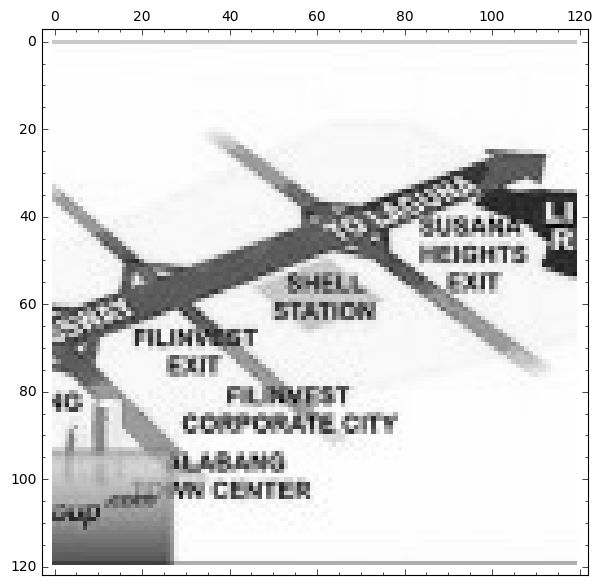

In [24]:
p2.plot(cmap="gray")

### Encryption
![](https://i.imgur.com/rejqmtv.png)

In [25]:
ecp1 = img2pts(p1, blksize)
ecp2 = img2pts(p2, blksize)

In [26]:
%%time
enecp1 = encrypt(ecp1)
enecp2 = encrypt(ecp2)

CPU times: user 11.9 s, sys: 18.4 ms, total: 12 s
Wall time: 12.4 s


In [27]:
def addimgs(enecp1, enecp2):
    c1, c2 = enecp1
    d1, d2 = enecp2
    return (c1+d1, [c+d for c,d in zip(c2,d2)])

In [28]:
aenecp = addimgs(enecp1, enecp2)

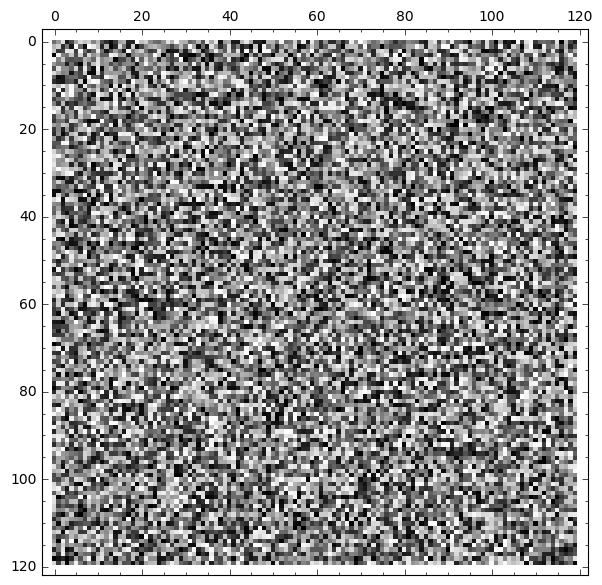

In [29]:
aenecp_img = blocks2img(aenecp[1], blksize, (120,120))
aenecp_img.plot(cmap="gray")

### Decryption
![](https://i.imgur.com/lnRL92J.png)

In [30]:
%%time
aecp = decrypt(aenecp)

CPU times: user 5.94 s, sys: 50.3 ms, total: 5.99 s
Wall time: 6.12 s


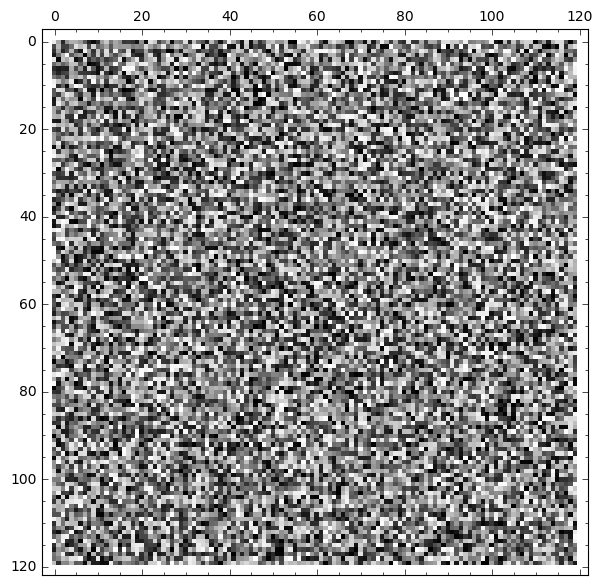

In [31]:
aecp_img = blocks2img(aecp, blksize, (120,120))
aecp_img.plot(cmap="gray")

In [32]:
ecp2d = [a-b for a,b in zip(aecp, ecp1)]

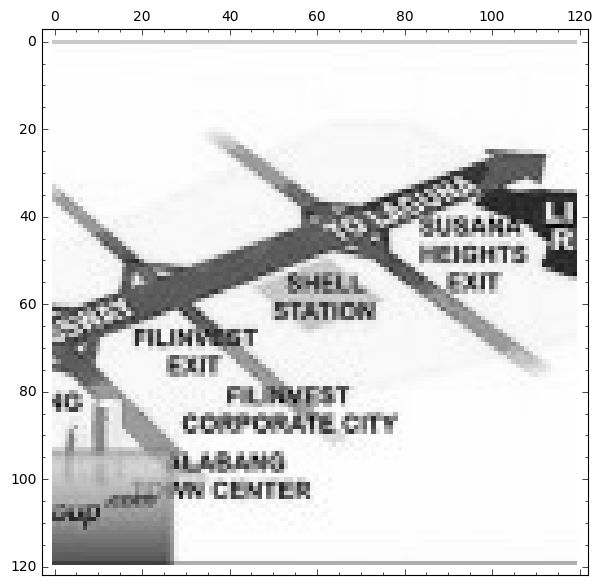

In [33]:
p2d = blocks2img(ecp2d, blksize, (120,120))
p2d.plot(cmap="gray")

In [34]:
p2 == p2d

True